# Project Data Analysis

This notebook contains the analysis of project data for the Reddit place experiment.

We have computed several distributions, scatter plots and visualizations to better understant the dataset.

To run this notebook, the following files should be precomputed in the '.../data/' folder:

1) sorted_tile_placements_proj.csv : Tile updates with project information added. Format: 

#ts,user,x_coordinate,y_coordinate,color,pic_id,pixel,pixel_color

2) sorted_tile_placements_proj_den_freq.csv : Denoised version of the previous file using Frequent Pixel heuristic.

3) sorted_tile_placements_proj_den_freq.csv : Denoised version of same file based on figure created by users.

4) atlas.json : Filtered version of the place atlas

# Sections:

## Single Variable
[Updates per Project](#Updates_per_Project)

[Updates Entropy per Project](#Updates_Entropy_per_Project)

[Updates Entropy (Time) per project](#Updates_Time_Entropy_per_Project)

[Colors and Entropy (Color) per Project (Original Data)](#Colors_and_Entropy_(Color)_per_Project_Original)

[Colors and Entropy (Color) per Project (Denoised Data using Frequent Color)](#Colors_and_Entropy_(Color)_per_Project_Denoised_Frequent)

[Colors and Entropy (Color) per Project (Denoised by Users)](#Colors_and_Entropy_(Color)_per_Project_Denoised_Users)

[Pixels per Project](#Pixels_per_Project)

[Projects per User](#Projects_per_User)

[Users per Project](#Users_per_Project)

[Time per Project](#Time_per_Project)

[Area per Project](#Area_per_Project)

## Two Variables

### Update
[Update vs Entropy](#Update_vs_Entropy)

[Update vs Pixel](#Update_vs_pixel)

[Update vs User](#Update_vs_User)

[Update vs Time](#Update_vs_Time)

[Update vs Area](#Update_vs_Area)

### Pixels

[Pixels vs Entropy](#Pixels_vs_Entropy)

[Pixels vs Users](#Pixels_vs_Users)

[Pixels vs Time](#Pixels_vs_Time)

[Pixels vs Area](#Pixels_vs_Area)

### Users

[Users vs Entropy](#Users_vs_Entropy)

[Users vs Time](#Users_vs_Time)

[Users vs Area](#Users_vs_Area)

### Time

[Time vs Entropy](#Time_vs_Entropy)

[Time vs Area](#Time_vs_Area)

### Area

[Area vs Entropy](#Area_vs_Entropy)

# Others

[Updates per Time](#Updates_per_time)

[Distance (Users)](#Distance_users)


In [1]:
import csv
import sys
import os
import math
import random
import numpy as np
import numpy.linalg as npla
import scipy
import sklearn
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
from scipy.spatial import distance
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
import operator

In [2]:
import sys
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from canvas_vis import *
from project_data_analysis import *
from generate_proj_to_remove import *

# Setting up Variables

In [3]:
#Run this before anything else!

input_file_proj = "../data/sorted_tile_placements_proj.csv"
input_file_proj_den_freq = "../data/sorted_tile_placements_proj_den_freq.csv"
input_file_proj_den_users = "../data/sorted_tile_placements_proj_den_users.csv"

# input_file_proj_den_freq = "../data/tile_placements_denoised_freq_proj.csv"
# input_file_proj_den_users = "../data/tile_placements_denoised_users_proj.csv"
# js_filename = "../data/atlas.json"
js_filename = "../data/atlas_complete.json"

#Projects to remove 777, 1921 (whole canvas), 1240, 1516 (1 pixel), 1319 (very incomplete)
#1169, 42 (repeated American Flag, 1122), 1066 (repeated blue corner 67), 
#1757 (repeated the far left side 736), 1824 (climber's head, too small)
#320 (repeated kenkistan/rainbow flat 3311)
#351 (repeated erase the place 1297)
#1046, 1073 (repeated channel orange 958)
#998, 1870 (repeated darth plagueis the wise 75)
#1383, 1493, 1823, 1818, 645, 1640 (Very small)
#1811, 1925, 1927, 704, 1085, 1308, 1378, 1412, 1418, 1428, 1455, 1482, 1512, 1548, 1589, 
#1614, 1790, 939, 1263, 1383, 1155, 1524, 129, 1595, 1254, 1528, 1529, 1578, 1616, 1721 (Covered)
# projects_to_remove = {'777', '1921', '1169', '42', '1066', '1757', '1824', '320', '998', '1870', '1811',\
#                      '1925', '1927', '704', '1085', '1308', '1378', '1412', '1418', '1428', '1455', '1482',\
#                       '1512', '1548', '1589', '1614', '1790', '1319', '939', '1263', '1383', '1155', '1761', 
#                      '1524', '351', '129', '1046', '1073', '1595', '1254', '1528', '1529', '1578', '1616',\
#                      '1721'}

projects_to_remove = get_list_of_removed_proj(output_filename = "../data/proj_to_remove.txt")
# projects_to_remove_ints = {1416,1900,2012,637,2010,1014,1455,1482,61,1913,1820,1493,360,235,645,1797,1990,2016,1418,399,2021,1206,1935,1378,704,1890,1707,1616,1412,23,1715,1658,2004,2025,1512,1790,1811,1383,1649,1348,286,285,1936,1891,1640,49,1763,56,1210,1557,2023,1720,48,1228,1758,1692,1139,1994,1598,1641,581,789,1240,357,1809,2007,1818,1904,1979,2018,347,1908,1122,361,1624,1695,21,123,1308,1824,1970,1548,2,181,46,1319,1981,1976,1039,1659,1940,1516,1823,75,1289,81,1085,1925,236,1849}
# projects_to_remove = set()
# for item in projects_to_remove_ints:
#     projects_to_remove.add(str(item))

locations = store_locations(js_filename)

names, descriptions = read_picture_names_and_descriptions(js_filename)

<a id='Updates_per_Project'></a>
# Updates per Project

In [4]:
#Computing updates per project
updates_per_proj, total_updates = updates_per_project(input_file_proj, projects_to_remove)

#computing the updates in three different category: agree,disagree,final
tile_updates, total_tile_updates = update_category_per_project()

print("total updates:", total_updates)

total updates: 16931854


In [5]:
sorted_up_proj = sorted(updates_per_proj.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_up_proj[:10])
#Top-10
for i in range(10):
    proj = sorted_up_proj[i][0]
    up = sorted_up_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", updates: ", up, ", \ndesc: ", desc, "\n")

[('95', 544512), ('1066', 359971), ('1757', 325616), ('73', 239336), ('147', 227597), ('1628', 209396), ('19', 197522), ('1946', 193857), ('1915', 190952), ('390', 169074)]
# 0 , project:  osu! Logo , updates:  544512 , 
desc:  The logo for the rhythm game osu. This was one of the more ambitious projects of /r/place and was intended to be more detailed. Unfortunately, a LoL player by the name of loltyler1, told his fans to attack the logo by filling it with the void, resulting in its current vandalized state. 

# 1 , project:  The Blue Empire , updates:  359971 , 
desc:  A simple project started to make the bottom right corner completely blue, quickly grew to be the largest piece of art in r/place history. Within 12 hours it had covered more than half of the bottom canvas, completely in blue, with thousand of dedicated supporters. The blue corner was pushed back gradually as more organised projects superseded the early pattern-based structures. The current blue corner is a mere reminde

In [6]:
#Bottom-10

for i in range(1,11):
    proj = sorted_up_proj[-i][0]
    up = sorted_up_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", updates: ", up, ", \ndescription: ", desc, "\n")

# 1 , project:  The Red Dot , updates:  17 , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  Smiley Face , updates:  84 , 
description:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 3 , project:  Tiny danish flag , updates:  112 , 
description:  denmark is a samll nation in the nothern part of europe 

# 4 , project:  The R , updates:  121 , 
description:  The R of the sub r/The_R 

# 5 , project:  St.Georges Flag , updates:  125 , 
description:  Created by /u/tinysocksb. The piece took several hours to create and was destroyed for reasons unknown, replaced by black blocks the space appears unused. Picture can be seen below on imgur. 

# 6 , project:  Red P , updates:  126 , 
description:  Seeing the whole work was an amazing piece of modern art, I really wanted to be a part of it. I decided to find a small unused spot an

In [7]:
#AVG

print("AVG = ", np.mean(np.array(list(updates_per_proj.values()))))

AVG =  11463.679079214624


In [8]:
#STD

print("STD = ", np.std(np.array(list(updates_per_proj.values()))))

STD =  28849.47033367225


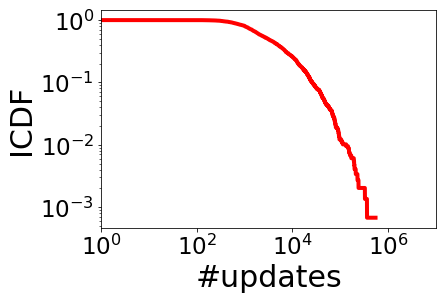

In [9]:
#Inverse cumulative density funcition

def plot_updates_per_project_icdf(count, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#updates', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(1,10000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count = icdf(updates_per_proj)
    
plot_updates_per_project_icdf(count, "../plots/plot_updates_per_project_icdf.svg")

<a id='Updates_Entropy_per_Project'></a>
# Updates Entropy per Project

In [10]:
#Computing update-entropy per project: agreeing vs disagreeing
#tile_updates is computed in the previous block
update_entropy_per_proj=update_entropy_per_project(tile_updates)

In [11]:
sorted_up_ent_proj = sorted(update_entropy_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_up_ent_proj[i][0]
    up_ent = sorted_up_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", update_entropy: ", up_ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Flag of Serbia , update_entropy:  0.6931470698749712 , 
desc:   

# 1 , project:  Lúcio , update_entropy:  0.6931470265813146 , 
desc:  Lúcio is a character from Overwatch (r/overwatch multiplayer first person shooter by blizzard), and, later, Heroes Of the Storm (r/heroesofthestorm, MOBA game, again, by Blizzard).<br>He's a DJ from Rio, Brazil, who uses futuristic sound-based technology to fight enemies. 

# 2 , project:  The Rise of MMA , update_entropy:  0.6931467866994165 , 
desc:  This area was contested for some time. Initially occupied by a Canadian Flag. /r/Dwarffortress initially tried to take out the flag as they expanded. However as /r/indonesia began their assault on dwarf territory, /r/dwarffortress ceded the territory to /r/mma in return for an alliance against the Indonesians. MMA had to fight with Vaporwave and the AR logo above before finally taking control of this area. 

# 3 , project:  Canada Heart , update_entropy:  0.6931466734856675 , 
desc:  The 

In [12]:

#Bottom-10
for i in range(1,11):
    proj = sorted_up_ent_proj[-i][0]
    up_ent = sorted_up_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", update_entropy: ", up_ent, ", \ndesc: ", desc, "\n")

# 1 , project:  (0,0) , update_entropy:  0.19495645830996725 , 
desc:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  Mars , update_entropy:  0.2158640137962607 , 
desc:  A depiction of the Red Planet. SpaceX's stated mission is to enable the human colonization of Mars within a few decades. 

# 3 , project:  The Red Dot , update_entropy:  0.22371807606583377 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 4 , project:  venus , update_entropy:  0.22711046403765367 , 
desc:   

# 5 , project:  Sydney FC , update_entropy:  0.30201824565562313 , 
desc:  An A-League soccer club located in Sydney, Australia. 

# 6 , project:  Gold Codfish , update_entropy:  0.3176416297834633 , 
desc:  The /r/portugal equivalent of reddit gold. Given to topics and posts of high quality in the subreddit (mod flair) 

# 7 ,

In [13]:
#AVG

print("AVG = ", np.mean(np.array(list(update_entropy_per_proj.values()))))

AVG =  0.6400541871769824


In [14]:
#STD

print("STD = ", np.std(np.array(list(update_entropy_per_proj.values()))))

STD =  0.067020022471085


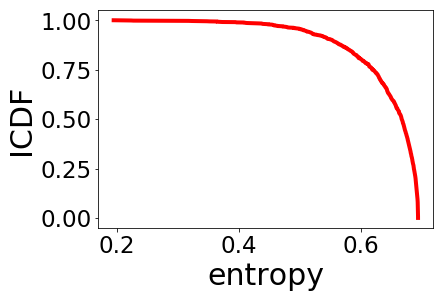

In [15]:
#Inverse cumulative density funcition
%matplotlib inline
def plot_update_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(0,math.log(.5)+.1, math.log(.1)))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(update_entropy_per_proj.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_update_entropies_per_project_icdf(entropy, count, "../plots/plot_update_entropies_users_icdf.svg")


<a id='Updates_Time_Entropy_per_Project'></a>
# Updates Entropy (Time) per Project

In [16]:
#Computing update-entropy per project: agreeing vs disagreeing over all the time slots (around 78 --- based on hours)
#tile_updates is computed in the previous block
update_time_entropy_per_proj=update_time_entropy_per_project(tile_updates)

In [17]:
sorted_up_time_ent_proj = sorted(update_time_entropy_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_up_time_ent_proj[i][0]
    up_ent = sorted_up_time_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", update_time_entropy: ", up_ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Chrono Trigger , update_time_entropy:  4.88644940581749 , 
desc:  Characters from the SNES Game Chrono Trigger. From Left to Right: Magus, Robo (Overworld), Frog, Lucca, Marle, Ayla, Catalack, Crono, Poyozo Doll, Alfador (Janus's Cat) 

# 1 , project:  Rainbow Road , update_time_entropy:  4.885420340162544 , 
desc:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 2 , project:  2007scape Memefest , update_time_entropy:  4.859837256416519 , 
desc:  Everything is this scare from Buying GF to the max cash pile are icons/memes from the game Oldschool Runescape 

# 3 , project:  The Blue Empire , update_time_entropy:  4.858880335515484 , 
desc:  A simple project started to make the bottom right corner completely blue, quickly grew to be the largest piece of art in r/place history. Within 12 hours it had covered more than half of the bottom canvas, completely in blue, with thousand of dedicated supporters. T

In [18]:
#Bottom-10
for i in range(1,11):
    proj = sorted_up_time_ent_proj[-i][0]
    up_ent = sorted_up_time_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", update_time_entropy: ", up_ent, ", \ndesc: ", proj, "\n")

# 1 , project:  The Red Dot , update_time_entropy:  1.2848787678241698 , 
desc:  1980 

# 2 , project:  Climber's Head (TowerClimb) , update_time_entropy:  2.2332703749380514 , 
desc:  1824 

# 3 , project:  ZUN (Touhou Project) , update_time_entropy:  2.76660808889955 , 
desc:  1784 

# 4 , project:  Flag of Madeira , update_time_entropy:  2.795325291037624 , 
desc:  1489 

# 5 , project:  Seventeen , update_time_entropy:  3.0173009882218986 , 
desc:  186 

# 6 , project:  Forsenboys , update_time_entropy:  3.019944871817405 , 
desc:  261 

# 7 , project:  Smiley Face , update_time_entropy:  3.064271096768814 , 
desc:  1419 

# 8 , project:  Karlstads International TIME Program , update_time_entropy:  3.068769843846288 , 
desc:  999 

# 9 , project:  Z , update_time_entropy:  3.079477496142267 , 
desc:  2009 

# 10 , project:  Intersex Heart , update_time_entropy:  3.096403870637453 , 
desc:  552 



In [19]:
#AVG

print("AVG = ", np.mean(np.array(list(update_time_entropy_per_proj.values()))))

AVG =  4.233429376707017


In [20]:
#STD

print("STD = ", np.std(np.array(list(update_time_entropy_per_proj.values()))))

STD =  0.3429412852058624


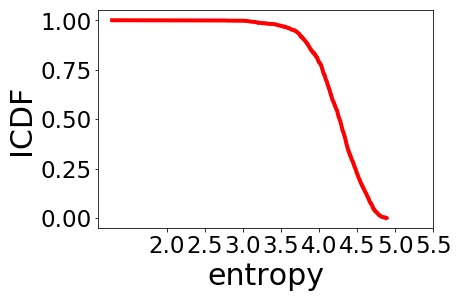

In [21]:
#Inverse cumulative density funcition
%matplotlib inline
def plot_update_time_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(0,math.exp(1)+.6, .69))
    ax.set_xticks(np.arange(2,6, .5))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(update_time_entropy_per_proj.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_update_time_entropies_per_project_icdf(entropy, count, "../plots/plot_update_time_entropies_users_icdf.svg")

<a id='Colors_and_Entropy_(Color)_per_Project_Original'></a>
# Colors and Entropy (Color) per Project (Original Data)

In [22]:
# Computing colors per project and entropies
#Only pixels (final) are considered.
colors_per_proj = colors_per_project(input_file_proj, projects_to_remove)
entropy_per_proj = entropy_per_project(colors_per_proj)

In [23]:
num_colors_per_proj = {}

for proj in colors_per_proj:
    num_colors_per_proj[proj] = np.count_nonzero(colors_per_proj[proj])

In [24]:
sorted_color_proj = sorted(num_colors_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_color_proj[i][0]
    colors = sorted_color_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 0 , project:  R.I.P. Steve Irwin , colors:  16 , 
desc:  A tribute to the late Crocodile Hunter Steve Irwin, courtesy of /r/Straya. Unfortunately, Steve was vandalized a bit before the final frame of /r/place - as a result, he's got an odd smiley line where his face should be and his date of death is wrong. It should be 4/9/06. 

# 1 , project:  Android Gaming , colors:  16 , 
desc:  The mascot of the Android mobile operating system, pictured with an SNES-style gamepad. 

# 2 , project:  Parahumans , colors:  16 , 
desc:  Banner for /r/parahumans, fan subreddit for web serials by Wildbow. Read Worm! 

# 3 , project:  He-Man , colors:  16 , 
desc:  He-Man is a character who has been in several comic books and TV shows, such as Masters of the Universe. 

# 4 , project:  AvoArmy , colors:  16 , 
desc:  a tiny pixel avocado 

# 5 , project:  Tatlin's Tower , colors:  16 , 
desc:  a design for a grand monumental building by the Russian artist and architect Vladimir Tatlin, that was never 

In [25]:
#Bottom-10

for i in range(1,11):
    proj = sorted_color_proj[-i][0]
    colors = sorted_color_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 1 , project:  The Red Dot , colors:  1 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  FRC team #4611 , colors:  1 , 
desc:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 3 , project:  Gold Codfish , colors:  2 , 
desc:  The /r/portugal equivalent of reddit gold. Given to topics and posts of high quality in the subreddit (mod flair) 

# 4 , project:  Canadian Flag , colors:  2 , 
desc:  The flag of Canada. 

# 5 , project:  PINLAND , colors:  2 , 
desc:  It was very common for users to change t

In [26]:
#AVG

print("AVG = ", np.mean(np.array(list(num_colors_per_proj.values()))))

AVG =  6.897765741367637


In [27]:
#STD

print("STD = ", np.std(np.array(list(num_colors_per_proj.values()))))

STD =  3.667969892551629


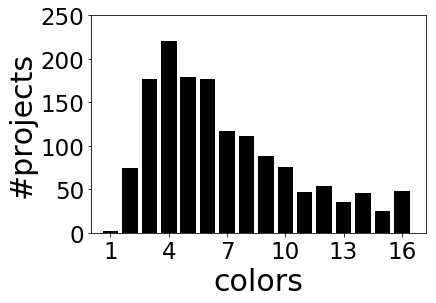

In [28]:
%matplotlib inline
def plot_colors_per_project_hst(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.bar(np.arange(count.shape[0]), count, color="black", linewidth=4)
    ax.set_ylabel('#projects', fontsize=30)
    ax.set_xlabel('colors', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(0,)
    ax.set_xticks(np.arange(1,17, 3))
    ax.set_yticks(np.arange(0, 300, 50))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

count = np.zeros(17)

for c in num_colors_per_proj.values():
    count[c] = count[c] + 1
    
plot_colors_per_project_hst(count, "../plots/plot_colors_project_hist.svg")

In [29]:
sorted_ent_proj = sorted(entropy_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_ent_proj[i][0]
    ent = sorted_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Unfinished Place World Congress Banner , entropy:  2.571020628332455 , 
desc:  Now known as Reddit World Congress was a Discord server used by many r/place diplomats to make peace treaties with other factions. The server had as many as 2.3k users at the time of r/place going down. The banner was never finished due to the project starting too late and small number of people helping to build it. https://puu.sh/v7YrL/135381821e.png 

# 1 , project:  Minor Remnant of Rainbow Road , entropy:  2.476548746053061 , 
desc:  A preserved bit of the Rainbow Road from the Cores glory days. Madoka Magica originally used it as a border for a proxy war with a Pi number. It remains as part of their banner. 

# 2 , project:  AvoArmy , entropy:  2.408796179077423 , 
desc:  a tiny pixel avocado 

# 3 , project:  Touhou Hijack , entropy:  2.407002560578154 , 
desc:  Four characters and five items from the "Touhou" series of bullet hell shooter video games; including the name of the series' 

In [30]:
#Bottom-10

for i in range(1,11):
    proj = sorted_ent_proj[-i][0]
    ent = sorted_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 1 , project:  The Red Dot , entropy:  0.0 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  FRC team #4611 , entropy:  0.0 , 
desc:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 3 , project:  PUBG , entropy:  0.03315839180969552 , 
desc:  A small tribute dedicated to the newly released game "PLAYERUNKNOWN's Battlegrounds." Destroyed by the void in the final moments. 

# 4 , project:  Former location of the Bullet Kin , entropy:  0.043331176817649 , 
desc:  The location of where a Bullet Kin, a c

In [31]:
#AVG

print("AVG = ", np.mean(np.array(list(entropy_per_proj.values()))))

AVG =  1.2978831122407584


In [32]:
#STD

print("STD = ", np.std(np.array(list(entropy_per_proj.values()))))

STD =  0.4101660102223455


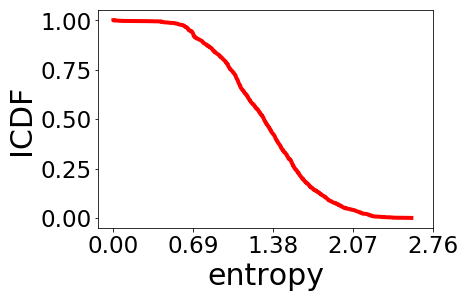

In [33]:
%matplotlib inline
def plot_color_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0,math.exp(1)+.1, .69))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(entropy_per_proj.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_color_entropies_per_project_icdf(entropy, count, "../plots/plot_color_entropies_icdf.svg")

<a id='Colors_and_Entrpy_(Color)_per_Project_Denoised_Frequent'></a>
# Colors and Entropy (Color) per Project (Denoised Data using Frequent Color)

In [34]:
# Computing colors per project and entropies
#Only pixels (final) are considered.

colors_per_proj_den_freq = colors_per_project(input_file_proj_den_freq, projects_to_remove)
entropy_per_proj_den_freq = entropy_per_project(colors_per_proj_den_freq)

In [35]:
num_colors_per_proj_den_freq = {}

for proj in colors_per_proj_den_freq:
    num_colors_per_proj_den_freq[proj] = np.count_nonzero(colors_per_proj_den_freq[proj])

In [36]:
sorted_color_proj = sorted(num_colors_per_proj_den_freq.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_color_proj[i][0]
    colors = sorted_color_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 0 , project:  The Far Left Side , colors:  17 , 
desc:  The Far left side was made up of dedicated Leftists working together to create a community on r/place 

# 1 , project:  No Step On Snek! , colors:  17 , 
desc:  'No step on snek' is an internet meme based on the Gadsden Flag is an iconic historical American flag.Snek survived to the end! We formed a small group to work on it at /r/placesnek and made a lot of friends with various other groups on our way through the canvas. Thanks to everyone who worked with us to make hecking big danger noodle! 

# 2 , project:  Madoka Magica , colors:  17 , 
desc:  Puella Magi Madoka Magica is a magical girl anime released on-air in 2011 

# 3 , project:  Flag of Italy , colors:  17 , 
desc:  After some early squabbling with r/TFLS and r/EmpireDidNothingWrong, Italy estabilished peaceful relations with its Communist and Imperial neighbours and went on to forge a mutual assistance pact with the Brits mantaining the UK flag cluster to the right. T

In [37]:
#Bottom-10

for i in range(1,11):
    proj = sorted_color_proj[-i][0]
    colors = sorted_color_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 1 , project:  Former location of the Bullet Kin , colors:  1 , 
desc:  The location of where a Bullet Kin, a common enemy from the game Enter The Gungeon, once existed. Enter the Gungeon is a bullet hell roguelike video game developed by Dodge Roll and published by Devolver Digital.<br> <br> The Bullet Kin was considered as a mascot, or "protector", of /r/TheBlueCorner despite its relatively late appearance. It was unintentionally engulfed during the final expanding of the blue corner. 

# 2 , project:  The Red Dot , colors:  1 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 3 , project:  PUBG , colors:  1 , 
desc:  A small tribute dedicated to the newly released game "PLAYERUNKNOWN's Battlegrounds." Destroyed by the void in the final moments. 

# 4 , project:  Destroyed Twenty One Pilots Logo , colors:  1 , 
desc:  Before the void took over this was the spot where the logo 

In [38]:
#AVG

print("AVG = ", np.mean(np.array(list(num_colors_per_proj_den_freq.values()))))

AVG =  7.285714285714286


In [39]:
#STD

print("STD = ", np.std(np.array(list(num_colors_per_proj_den_freq.values()))))

STD =  3.4521027288882857


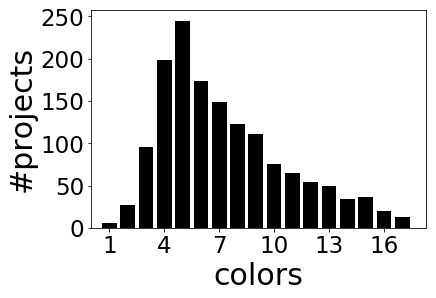

In [40]:
%matplotlib inline
def plot_colors_per_project_hst(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.bar(np.arange(count.shape[0]), count, color="black", linewidth=4)
    ax.set_ylabel('#projects', fontsize=30)
    ax.set_xlabel('colors', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(0,)
    ax.set_xticks(np.arange(1,17, 3))
    ax.set_yticks(np.arange(0, 300, 50))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

count = np.zeros(18)
for c in num_colors_per_proj_den_freq.values():

    count[c] = count[c] + 1
    
plot_colors_per_project_hst(count, "../plots/plot_colors_project_den_freq_hist.svg")

In [41]:
sorted_ent_proj = sorted(entropy_per_proj_den_freq.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_ent_proj[i][0]
    ent = sorted_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Unfinished Place World Congress Banner , entropy:  2.4688126073215972 , 
desc:  Now known as Reddit World Congress was a Discord server used by many r/place diplomats to make peace treaties with other factions. The server had as many as 2.3k users at the time of r/place going down. The banner was never finished due to the project starting too late and small number of people helping to build it. https://puu.sh/v7YrL/135381821e.png 

# 1 , project:  Touhou Hijack , entropy:  2.4324574202301426 , 
desc:  Four characters and five items from the "Touhou" series of bullet hell shooter video games; including the name of the series' creator, ZUN. 

# 2 , project:  AvoArmy , entropy:  2.4201407616633785 , 
desc:  a tiny pixel avocado 

# 3 , project:  Minor Remnant of Rainbow Road , entropy:  2.3745482475390665 , 
desc:  A preserved bit of the Rainbow Road from the Cores glory days. Madoka Magica originally used it as a border for a proxy war with a Pi number. It remains as part

In [42]:
#Bottom-10

for i in range(1,11):
    proj = sorted_ent_proj[-i][0]
    ent = sorted_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 1 , project:  Former location of the Bullet Kin , entropy:  0.0 , 
desc:  The location of where a Bullet Kin, a common enemy from the game Enter The Gungeon, once existed. Enter the Gungeon is a bullet hell roguelike video game developed by Dodge Roll and published by Devolver Digital.<br> <br> The Bullet Kin was considered as a mascot, or "protector", of /r/TheBlueCorner despite its relatively late appearance. It was unintentionally engulfed during the final expanding of the blue corner. 

# 2 , project:  The Red Dot , entropy:  0.0 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 3 , project:  PUBG , entropy:  0.0 , 
desc:  A small tribute dedicated to the newly released game "PLAYERUNKNOWN's Battlegrounds." Destroyed by the void in the final moments. 

# 4 , project:  Destroyed Twenty One Pilots Logo , entropy:  0.0 , 
desc:  Before the void took over this was the spot whe

In [43]:
#AVG

print("AVG = ", np.mean(np.array(list(entropy_per_proj_den_freq.values()))))

AVG =  1.3597376099603729


In [44]:
#STD

print("STD = ", np.std(np.array(list(entropy_per_proj_den_freq.values()))))

STD =  0.3747268949918745


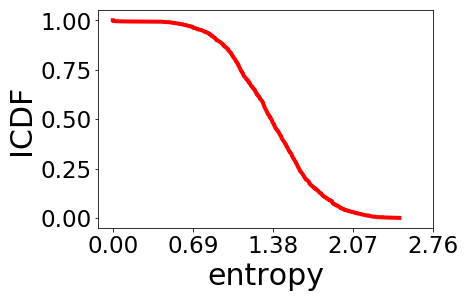

In [45]:
%matplotlib inline
def plot_color_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0,math.exp(1)+.1, .69))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(entropy_per_proj_den_freq.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_color_entropies_per_project_icdf(entropy, count, "../plots/plot_color_entropies_den_freq_icdf.svg")

<a id='Colors_and_Entropy_(Color)_per_Project_Denoised_Users'></a>
# Colors and Entropy (Color) per Project (Denoised Data using Canvas Denoised by Users)

In [46]:
# Computing colors per project and entropies
#Only pixels (final) are considered.
colors_per_proj_den_users = colors_per_project(input_file_proj_den_users, projects_to_remove)
entropy_per_proj_den_users = entropy_per_project(colors_per_proj_den_users)

In [47]:
num_colors_per_proj_den_users = {}

for proj in colors_per_proj_den_users:
    num_colors_per_proj_den_users[proj] = np.count_nonzero(colors_per_proj_den_users[proj])

In [48]:
sorted_color_proj = sorted(num_colors_per_proj_den_users.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_color_proj[i][0]
    colors = sorted_color_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 0 , project:  The Yellow Triangle , colors:  16 , 
desc:  When red, green, blue, and eventually purple claimed corners, fans of yellow attempted to carve out their own area.  After fleeing from a failed right-side colony to the left side and then losing half their territory to the rainbow, they decided to fill the triangle that it made. Agreements were made with HLG, the batman logo, babymetal, the mushroom, FRC, the Nerd Cubed N, and others, and after losing the top half of the triangle to the Poland flag, the remaining background was successfully colored yellow. A few individuals began turning part of it into a yellow/orange checkerboard pattern near the end. 

# 1 , project:  The Far Left Side , colors:  16 , 
desc:  The Far left side was made up of dedicated Leftists working together to create a community on r/place 

# 2 , project:  Pharah from Overwatch , colors:  16 , 
desc:  Pharah is one of the playable characters in Overwatch, a team-based multiplayer first-person shooter v

In [49]:
#Bottom-10

for i in range(1,11):
    proj = sorted_color_proj[-i][0]
    colors = sorted_color_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 1 , project:  Former location of the Bullet Kin , colors:  1 , 
desc:  The location of where a Bullet Kin, a common enemy from the game Enter The Gungeon, once existed. Enter the Gungeon is a bullet hell roguelike video game developed by Dodge Roll and published by Devolver Digital.<br> <br> The Bullet Kin was considered as a mascot, or "protector", of /r/TheBlueCorner despite its relatively late appearance. It was unintentionally engulfed during the final expanding of the blue corner. 

# 2 , project:  Little French Flags , colors:  1 , 
desc:  Little space with cute flags. Not far from here could have been an Eiffel Tower, between the flag, Starry Night, and the ugly bitcoin mess. 

# 3 , project:  The Red Dot , colors:  1 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 4 , project:  FRC team #4611 , colors:  1 , 
desc:  As one of thousands of FRC (below) teams, 4611 was d

In [50]:
#AVG

print("AVG = ", np.mean(np.array(list(num_colors_per_proj_den_users.values()))))

AVG =  7.021665538253216


In [51]:
#STD

print("STD = ", np.std(np.array(list(num_colors_per_proj_den_users.values()))))

STD =  3.4689166908377675


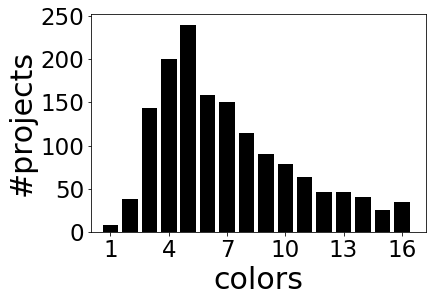

In [52]:
%matplotlib inline
def plot_colors_per_project_hst(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.bar(np.arange(count.shape[0]), count, color="black", linewidth=4)
    ax.set_ylabel('#projects', fontsize=30)
    ax.set_xlabel('colors', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(0,)
    ax.set_xticks(np.arange(1,17, 3))
    ax.set_yticks(np.arange(0, 300, 50))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

count = np.zeros(17)

for c in num_colors_per_proj_den_users.values():
    count[c] = count[c] + 1
    
plot_colors_per_project_hst(count, "../plots/plot_colors_project_den_users_hist.svg")

In [53]:
sorted_ent_proj = sorted(entropy_per_proj_den_users.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_ent_proj[i][0]
    ent = sorted_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Minor Remnant of Rainbow Road , entropy:  2.4774590214871446 , 
desc:  A preserved bit of the Rainbow Road from the Cores glory days. Madoka Magica originally used it as a border for a proxy war with a Pi number. It remains as part of their banner. 

# 1 , project:  The Flag of Mexico , entropy:  2.4478401487517716 , 
desc:  This is an attempt at creating a Mexican flag. Unfortunately, it was overtaken by other projects. 

# 2 , project:  AvoArmy , entropy:  2.434763398105075 , 
desc:  a tiny pixel avocado 

# 3 , project:  Portal , entropy:  2.416465187363465 , 
desc:  A portal from the game Portal by Valve. This portal and its matching orange end was drawn by /r/ainbowroad to protect a Waldo drawing from being overrun by the rainbow. The orange portal and Waldo are now mostly gone. 

# 4 , project:  Touhou Hijack , entropy:  2.402891310043159 , 
desc:  Four characters and five items from the "Touhou" series of bullet hell shooter video games; including the name of the

In [54]:
#Bottom-10

for i in range(1,11):
    proj = sorted_ent_proj[-i][0]
    ent = sorted_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 1 , project:  Former location of the Bullet Kin , entropy:  0.0 , 
desc:  The location of where a Bullet Kin, a common enemy from the game Enter The Gungeon, once existed. Enter the Gungeon is a bullet hell roguelike video game developed by Dodge Roll and published by Devolver Digital.<br> <br> The Bullet Kin was considered as a mascot, or "protector", of /r/TheBlueCorner despite its relatively late appearance. It was unintentionally engulfed during the final expanding of the blue corner. 

# 2 , project:  Little French Flags , entropy:  0.0 , 
desc:  Little space with cute flags. Not far from here could have been an Eiffel Tower, between the flag, Starry Night, and the ugly bitcoin mess. 

# 3 , project:  The Red Dot , entropy:  0.0 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 4 , project:  FRC team #4611 , entropy:  0.0 , 
desc:  As one of thousands of FRC (below) teams

In [55]:
#AVG

print("AVG = ", np.mean(np.array(list(entropy_per_proj_den_users.values()))))

AVG =  1.3605571138767416


In [56]:
#STD

print("STD = ", np.std(np.array(list(entropy_per_proj_den_users.values()))))

STD =  0.39633952577613313


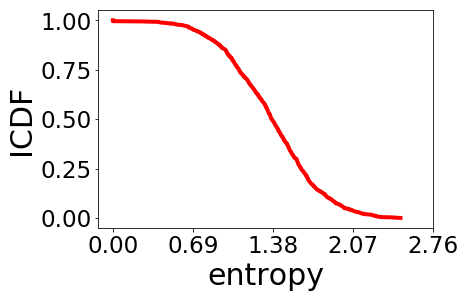

In [57]:
%matplotlib inline
def plot_color_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0,math.exp(1)+.1, .69))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(entropy_per_proj_den_users.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_color_entropies_per_project_icdf(entropy, count, "../plots/plot_color_entropies_den_users_icdf.svg")

<a id='Pixels_per_Project'></a>
# Pixels per Project

In [58]:
# Computing number of pixels per project
#Only pixels (final) are considered.
pixels_per_proj = pixels_per_project(input_file_proj, projects_to_remove)

In [59]:
sorted_pixel_proj = sorted(pixels_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_pixel_proj[i][0]
    pix = sorted_pixel_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", pixels: ", pix, ", \ndesc: ", desc, "\n")

# 0 , project:  Madoka Magica , pixels:  8606 , 
desc:  Puella Magi Madoka Magica is a magical girl anime released on-air in 2011 

# 1 , project:  Big Ten Corner , pixels:  8362 , 
desc:  11 of the 14 teams in the Big Ten have their logo represented in this part of r/place.<br>The Big Ten Conference (B1G), is the oldest Division I collegiate athletic conference in the United States. The conference, consisting of 14 members as of 2016, competes in the NCAA Division I; its football teams compete in the Football Bowl Subdivision (FBS), the highest level of NCAA competition in that sport. 

# 2 , project:  Starry Night , pixels:  8006 , 
desc:  The Starry Night is an oil on canvas by the Dutch post-impressionist painter Vincent van Gogh, painted in June 1889- 

# 3 , project:  RuneScape disconnected message , pixels:  7922 , 
desc:  This message is displayed when an user loses connection to the server in the MMORPG Runescape. Built by /r/runescape and /r/2007scape. 

# 4 , project:  2007s

In [60]:
#Bottom-10

for i in range(1,11):
    proj = sorted_pixel_proj[-i][0]
    pix = sorted_pixel_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", pixels: ", pix, ", \ndesc: ", desc, "\n")

# 1 , project:  The Red Dot , pixels:  1 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  PINLAND , pixels:  5 , 
desc:  It was very common for users to change these few pixels so the F turned into a P 

# 3 , project:  The purple corner , pixels:  9 , 
desc:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 4 , project:  Ethiopian Flag , pixels:  9 , 
desc:  The flag of the african country of Ethiopia. It was created and maintained by a single user (/u/faithfuljohn), hence why it is so small. 

# 5 , project:  Eightfold , pixels:  15 , 
desc:  What remains of Eightfo

In [61]:
#AVG

print("AVG = ", np.mean(np.array(list(pixels_per_proj.values()))))

AVG =  633.6939742721734


In [62]:
#STD

print("STD = ", np.std(np.array(list(pixels_per_proj.values()))))

STD =  1037.8785768097623


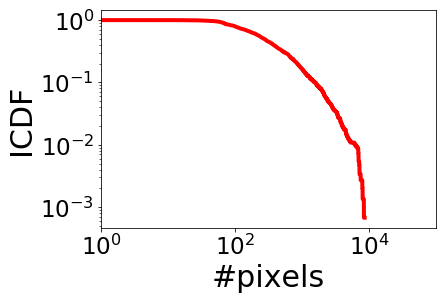

In [63]:
%matplotlib inline
def plot_pixels_per_project_icdf(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.loglog(np.arange(count.shape[0]), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(1,100000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
count = icdf(pixels_per_proj)
    
plot_pixels_per_project_icdf(count, "../plots/plot_pixels_icdf.svg")

<a id='Projects_per_User'></a>
# Projects per User

In [64]:
#Projects per User
#Only updates that agree with the final color of the tile are considered
proj_per_user = projects_per_user(input_file_proj, projects_to_remove)

In [65]:
sorted_proj_per_user = sorted(proj_per_user.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    user = sorted_proj_per_user[i][0]
    n = sorted_proj_per_user[i][1]
    
    print("#", i, ", user: ", user, ", projects: ", n)

# 0 , user:  gIIoT+oPbML64+byH2Ms6FIj1sM= , projects:  90
# 1 , user:  Ij3o7pMe0KXqHHkMpLYeZY3lJpU= , projects:  69
# 2 , user:  oV/QBQVpRBPm5K4UoK73KXfcG0o= , projects:  60
# 3 , user:  ZSPEY69+JkkBBY/a3gb/jUvXIgA= , projects:  57
# 4 , user:  lnmjEGEWgq+s9joisWlkVYoEaUA= , projects:  51
# 5 , user:  8xow27kDaned3b13ENiuQT9fmRE= , projects:  51
# 6 , user:  NPRAwHkxG3WBneXIpPgRvWXEBJE= , projects:  48
# 7 , user:  OsnDa+2E+woJy7TN3U87yLQrbu8= , projects:  48
# 8 , user:  RfWg9AaIkgiQAB+CsEEdaWqqp0g= , projects:  46
# 9 , user:  0wE+DHwCGmhtkBF5KcyyqlDbId8= , projects:  42


In [66]:
#Bottom-10

for i in range(1,11):
    user = sorted_proj_per_user[-i][0]
    n = sorted_proj_per_user[-i][1]
    
    print("#", i, ", user: ", user, ", projects: ", n)

# 1 , user:  qnHKJsXHi0LLIHNQG762oaTm3sM= , projects:  1
# 2 , user:  O3rlOmb0o2qZie8tKKHl9smeUPw= , projects:  1
# 3 , user:  lgaE/V/9zREHrLMuFIswAvPxmew= , projects:  1
# 4 , user:  0c9D13zQkmgdniU8XVu4pXKcJIs= , projects:  1
# 5 , user:  dG3SvnzpmXW00r+Epmrcw2Q9z/I= , projects:  1
# 6 , user:  3dBq/F6V4mTlI4SCp9Ew+MG93dk= , projects:  1
# 7 , user:  zb4RPTmWb/00azu/FDHIEk9uJd4= , projects:  1
# 8 , user:  c/xCGHwfKIw5TZaKYv7kxl32H2A= , projects:  1
# 9 , user:  5tVvknRa6e7LZsD+Y2IqrXPEurE= , projects:  1
# 10 , user:  1kUgeCovEjI5tNn4H89uWMG3KUk= , projects:  1


In [67]:
#AVG

print("AVG = ", np.mean(np.array(list(proj_per_user.values()))))

AVG =  3.18585882808681


In [68]:
#STD

print("STD = ", np.std(np.array(list(proj_per_user.values()))))

STD =  2.9842860287589925


In [69]:
#Median

print("Median = ", np.median(np.array(list(proj_per_user.values()))))

Median =  2.0


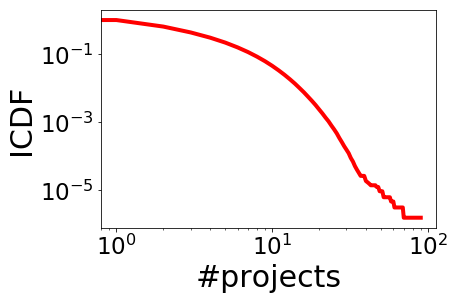

In [70]:
%matplotlib inline
def plot_projects_per_user_icdf(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.loglog(np.arange(count.shape[0]), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#projects', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_yticks(np.arange(0,1.1,0.25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count = icdf(proj_per_user)

plot_projects_per_user_icdf(count, "../plots/plot_proj_user_icdf.svg")

<a id='Users_per_Project'></a>

# Users per Project

In [71]:
# Users per Project
#Only updates that aggree with the final color of the tile are considered
users_per_proj = users_per_project(input_file_proj, projects_to_remove)   

In [72]:
sorted_users_per_proj = sorted(users_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_users_per_proj[i][0]
    n = sorted_users_per_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", users: ", n, ", \ndesc: ", desc, "\n")

# 0 , project:  The Blue Empire , users:  54510 , 
desc:  A simple project started to make the bottom right corner completely blue, quickly grew to be the largest piece of art in r/place history. Within 12 hours it had covered more than half of the bottom canvas, completely in blue, with thousand of dedicated supporters. The blue corner was pushed back gradually as more organised projects superseded the early pattern-based structures. The current blue corner is a mere reminder of what the empire was in it's former glory. 

# 1 , project:  osu! Logo , users:  47727 , 
desc:  The logo for the rhythm game osu. This was one of the more ambitious projects of /r/place and was intended to be more detailed. Unfortunately, a LoL player by the name of loltyler1, told his fans to attack the logo by filling it with the void, resulting in its current vandalized state. 

# 2 , project:  RuneScape disconnected message , users:  40005 , 
desc:  This message is displayed when an user loses connection t

In [73]:
#Bottom-10

for i in range(1,11):
    proj = sorted_users_per_proj[-i][0]
    n = sorted_users_per_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", users: ", n, ", \ndesc: ", desc, "\n")

# 1 , project:  The Red Dot , users:  1 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  Smiley Face , users:  6 , 
desc:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 3 , project:  The R , users:  7 , 
desc:  The R of the sub r/The_R 

# 4 , project:  BIGBANG , users:  9 , 
desc:  BIGBANG is a South Korean boy group who debuted in 2006 under YG Entertainment. The group, consisting of members T.O.P, Taeyang, Daesung, Seungri and leader G-Dragon are often labelled the 'Kings of K-pop' and can be considered the most influential boy group within Asia. Pictured to the left is the Bigbang crown which sits atop of the lightsticks which their fans (VIPs) wave and Bigbang concerts. 

# 5 , project:  CUL , users:  9 , 
desc:  CUL means "ass" in french.
We are very proud to have written this word a few hours before the end of /r/place.
T

In [74]:
#AVG

print("AVG = ", np.mean(np.array(list(users_per_proj.values()))))

AVG =  1403.1712931618144


In [75]:
#STD

print("STD = ", np.std(np.array(list(users_per_proj.values()))))

STD =  3460.052545934064


In [76]:
#Median
print("Median = ", np.median(np.array(list(users_per_proj.values()))))

Median =  382.0


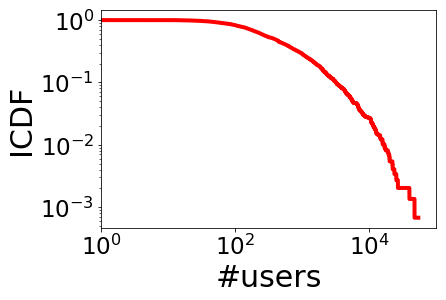

In [77]:
%matplotlib inline
def plot_users_per_project_icdf(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.loglog(np.arange(count.shape[0]), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#users', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(1, 100000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count = icdf(users_per_proj)

plot_users_per_project_icdf(count, "../plots/plot_user_proj_icdf.svg")

<a id='Time_per_Project'></a>
# Time per Project

In [78]:
#Time per project
#Only updates that aggree with the final color of the tile are considered
times_per_proj = times_per_project(input_file_proj, projects_to_remove)

In [79]:
sorted_times_per_proj = sorted(times_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_times_per_proj[i][0]
    t = sorted_times_per_proj[i][1] / (1000 * 60 * 60)
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", time: ", t, ", \ndesc: ", desc, "\n")

# 0 , project:  The Void Prism , time:  87.43916666666667 , 
desc:  The void was an ever-expanding area of darkness, until it was filled with the Prism from the album art of Pink FLoyd's Dark Side of the Moon. 

# 1 , project:  Rainbow Grid , time:  85.22777777777777 , 
desc:  Started and initially maintained by a single individual, this eventually became "hiveminded" - maintained entirely by an unorganized group of random individuals. It was abandoned by its creator and given to r/EraseThePlace, being long time allies. ETP gladly began their work, though resistance was met with the arrival of The Gray Thing... 

# 2 , project:  Nine Inch Nails , time:  84.48694444444445 , 
desc:  The logo of the industrial rock band Nine Inch Nails, appropriately glitched out by random pixels. 

# 3 , project:  Radiohead , time:  84.45916666666666 , 
desc:  A section staked out by fans of British art rock band Radiohead. Drawn here are the band's "Modified Bear" mascot and the corrupted text from the 

In [80]:
#Bottom-10

for i in range(1,11):
    proj = sorted_times_per_proj[-i][0]
    t = sorted_times_per_proj[-i][1] / (1000 * 60 * 60)
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", time: ", t, ", \ndesc: ", desc, "\n")

# 1 , project:  The Red Dot , time:  0.0 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  Seventeen , time:  10.676111111111112 , 
desc:  SEVENTEEN, or SVT, is a South Korean boy idol group that debuted in 2015 with Pledis Entertainment. Their members are divided into three sub-units. Their official fan club is known as Carat, with a jewel icon.  It is represented here in their fandom colors. 

# 3 , project:  Make Trade Fair , time:  16.12527777777778 , 
desc:  An organization supported by frontman Chris Martin of Coldplay drawn by the nearby Coldplay redditors. 

# 4 , project:  TOPS , time:  21.069166666666668 , 
desc:  A school program called TOPS, written in by 3-4 people, led by /u/Thunderbird2678. 

# 5 , project:  Tiny Flaggy Flag , time:  31.919444444444444 , 
desc:  Flaggy Flag is the Rebel Flag of the Hello Internet Podcast with Dr. Brady Haran and his 

In [81]:
#AVG (hours)

print("AVG = ", np.mean(np.array(list(times_per_proj.values())))/(1000 * 60 * 60))

AVG =  69.50473501090799


In [82]:
#STD (hours)

print("STD = ", np.std(np.array(list(times_per_proj.values())))/(1000 * 60 * 60))

STD =  4.82575385029515


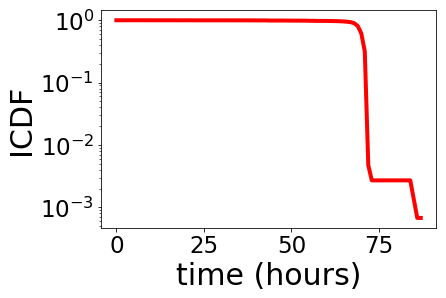

In [83]:
%matplotlib inline
def plot_times_per_project_icdf(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.semilogy(np.arange(count.shape[0]), count, color="red", linewidth=4) #millisecons to hours
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(0,101,25))
    #ax.set_xlim(None, 100)
    #ax.set_yticks(np.arange(0,1.1,0.25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
times_per_proj_hours = {}

for proj in times_per_proj:
    times_per_proj_hours[proj] = int(times_per_proj[proj] / (1000 * 60 * 60))

count = icdf(times_per_proj_hours)

plot_times_per_project_icdf(count, "../plots/plot_time_proj_icdf.svg")

<a id='Area_per_Project'></a>
# Area per Project

In [84]:
#Area per project (area is between 0 to 1)
#input_file_proj= "../data/sorted_tile_placements_proj.csv"
area_per_proj = area_per_project(input_file_proj,projects_to_remove)

In [85]:
sorted_area_per_proj = sorted(area_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_area_per_proj[i][0]
    a = sorted_area_per_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", area: ", a, ", \ndesc: ", desc, "\n")

# 0 , project:  Flag of Switzerland , area:  1.0 , 
desc:   

# 1 , project:  Flag of Lithuania , area:  1.0 , 
desc:   

# 2 , project:  Lego , area:  1.0 , 
desc:  Lego is a line of plastic construction toys made in Denmark. 

# 3 , project:  Trogdor the Burninator , area:  1.0 , 
desc:  Trogdor the Burninator is a figure from the Homestar Runner internet cartoon series. 

# 4 , project:  Factorio , area:  1.0 , 
desc:  Factorio is a real-time strategy video game with base-building and management elements developed by Wube Software. 

# 5 , project:  European Union , area:  1.0 , 
desc:  After a long battle between /r/france and /r/de, both parties negotiated peace and placed the flag of the EU with a dove of peace on the disputed territory. 

# 6 , project:  Flag of Germany , area:  1.0 , 
desc:   

# 7 , project:  Flag of South Africa , area:  1.0 , 
desc:   

# 8 , project:  Flag of Belgium , area:  1.0 , 
desc:   

# 9 , project:  Bitcoin , area:  1.0 , 
desc:  Bitcoin is a crypt

In [86]:

#Bottom-10
for i in range(1,11):
    proj = sorted_area_per_proj[-i][0]
    a = sorted_area_per_proj[-i][1] 
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", area: ", a, ", \ndesc: ", desc, "\n")

# 1 , project:  The Dutch Border , area:  0.060002013490385586 , 
desc:  The dutch border flag was used by the Netherlands to indicate their territory. Some of the Dutch planned to overtake the triangular area in this corner, with the Unregistered HyperCam 2, Rainbow Road and the right edge as borders. However, after some discussion of the Dutch diplomats with the makers of Pharah this plan was cancelled and an agreement was made not to expand in their direction. The first made steps of this plan, the orange colour and the border flag, still remains. 

# 2 , project:  /r/parahumans worm , area:  0.06153541749109616 , 
desc:  It's a worm created by the subreddit /r/parahumans.
It doubles as a tail for "The Beast". Although it was developed independently initially, /r/Portugal suggested that its head popped up on their side, which was agreed upon. It also features a traditional Portuguese hat with national colors. 

# 3 , project:  The Dutch border , area:  0.08088080501873605 , 
desc:  

In [87]:
#AVG 

print("AVG = ", np.mean(np.array(list(area_per_proj.values()))))

AVG =  0.8035150320201412


In [88]:
#STD 

print("STD = ", np.std(np.array(list(area_per_proj.values())))/(1000 * 60 * 60))

STD =  5.313062818101598e-08


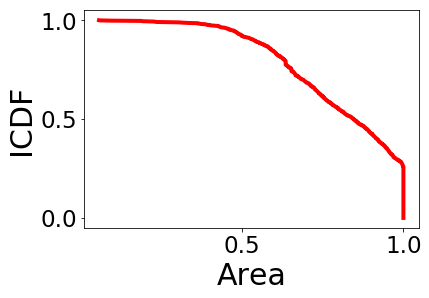

In [89]:
%matplotlib inline
def plot_area_per_project_icdf(area, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(area, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('Area', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(0,101,25))
    #ax.set_xlim(None, 100)
    #ax.set_yticks(np.arange(0,1.1,0.25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
    
#Computing ICDF
area = sorted(list(area_per_proj.values()))
count = np.arange(len(area)+1)[len(area)+1:0:-1]
count = count / count[0]


plot_area_per_project_icdf(area,count, "../plots/plot_area_proj_icdf.svg")

# Two Variables

<a id='Update_vs_Entropy'></a>
# Update vs Entropy

In [90]:
#Updates vs. entropy 
X,Y = Create_Array(updates_per_proj,entropy_per_proj)

#Updates vs.entropy: ratio and ID
ratios, IDs = Ratio(updates_per_proj,entropy_per_proj, names)


In [91]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [92]:
#Correlation
np.corrcoef(X, Y)

array([[1.        , 0.08572203],
       [0.08572203, 1.        ]])

In [93]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ent = entropy_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i,", project: ", name, ", entropy: ", ent, ", updates: ", up, ", entropy/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 0 , project:  Red P , entropy:  1.2226561670871259 , updates:  126 , entropy/update:  0.009703620373707348         , 
description:  Seeing the whole work was an amazing piece of modern art, I really wanted to be a part of it. I decided to find a small unused spot and put my initial there. The void and erase factions were savage and had wiped two previous efforts and a larger piece of art I was helping maintain, so I found a spot and used a script running on 2 PC's to maintain my small part of the artwork until place ended, which happened while I was sleeping. 

# 1 , project:  Tiny danish flag , entropy:  1.0821955300387671 , updates:  112 , entropy/update:  0.00966246008963185         , 
description:  denmark is a samll nation in the nothern part of europe 

# 2 , project:  Italy heart , entropy:  1.1115310092213608 , updates:  128 , entropy/update:  0.008683836009541882         , 
description:  A random heart or a symbol of cooperation between Scott Pilgrim and Italy? 

# 3 , proje

In [94]:
#Bottom-10    
for i in range(1, 11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ent = entropy_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", updates: ", up, ", entropy/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  The Red Dot , entropy:  0.0 , updates:  17 , entropy/update:  0.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  FRC team #4611 , entropy:  0.0 , updates:  2328 , entropy/update:  0.0         , 
description:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 3 , project:  The Blue Empire , entropy:  0.5238789747161786 , updates:  359971 , entropy/update:  1.4553366096607187e-06         , 
description:  A simple project started to make the bottom right corner completely

<Figure size 432x288 with 0 Axes>

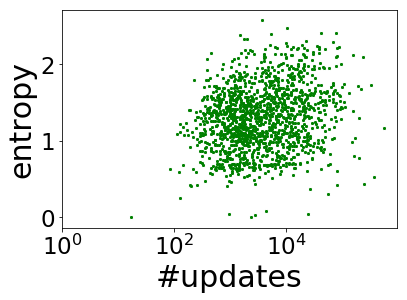

In [95]:
%matplotlib inline

def plot_updates_vs_entropy(X, Y, output_file_name):
    plt.clf()
    fig, ax = plt.subplots()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    #ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    ax.set_xlim(1,None)
    
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_entropy(X, Y, "../plots/plot_updates_vs_entropy.svg")

5

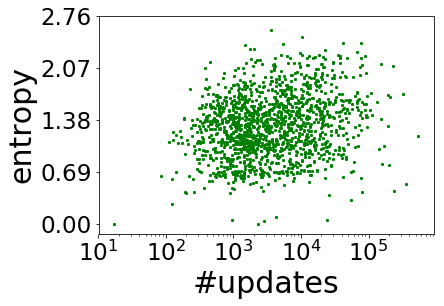

In [96]:
#Showing project IDs on mouse hovering. Based on:
#https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib

%matplotlib tk
cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('entropy', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Update_vs_Pixels'></a>
# Update vs Pixel

In [213]:
#Updates vs. Pixels 
X,Y = Create_Array(updates_per_proj,pixels_per_proj)


#Updates vs. pixels: ratio and ID
ratios, IDs = Ratio(updates_per_proj,pixels_per_proj, names)

In [98]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [99]:
#Correlation
np.corrcoef(X, Y)

array([[1.        , 0.75920255],
       [0.75920255, 1.        ]])

In [100]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    pix = pixels_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i,", project: ", name, ", pixels: ", pix, ", updates: ", up, ", pixels/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 0 , project:  Seplunky , pixels:  370 , updates:  937 , pixels/update:  0.39487726787620064         , 
description:  Player character from the platform indie game Spelunky. 

# 1 , project:  Bread , pixels:  70 , updates:  183 , pixels/update:  0.3825136612021858         , 
description:  A loaf of Bread constructed by a few users of Anarchist subreddits to represent the ideas of Pyotr Kropotkin, Russian anarchist and author of the influential anarchist book, 'The Conquest of Bread'. Since this was a relatively late addition to the place, and is not a particularly obviously Leftist symbol, the Bread saw little vandalism and required no bots to maintain. 

# 2 , project:  Amaura , pixels:  50 , updates:  142 , pixels/update:  0.352112676056338         , 
description:  The head of the Generation 6 Fossil Pokémon Amaura. The body was covered up by surrounding art. 

# 3 , project:  Toucan , pixels:  347 , updates:  1060 , pixels/update:  0.3273584905660377         , 
description:  le tou

In [101]:
#Bottom-10    
for i in range(1, 11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    pix = pixels_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i,", project: ", name, ", pixels: ", pix, ", updates: ", up, ", pixels/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  The purple corner , pixels:  9 , updates:  20703 , pixels/update:  0.000434719605854224         , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 2 , project:  PINLAND , pixels:  5 , updates:  5493 , pixels/update:  0.0009102494083378846         , 
description:  It was very common for users to change these few pixels so the F turned into a P 

# 3 , project:  Trans Heart , pixels:  61 , updates:  20308 , pixels/update:  0.003003742367539886         , 
description:  The first heart created by /r/TransFlagPlace, marking the centerpoint of the flag. 

# 4 , project:  Hammer and Sickle , pixels:  835 , updates:  169074 , pixels/update:  0.004938665909601713     

<Figure size 432x288 with 0 Axes>

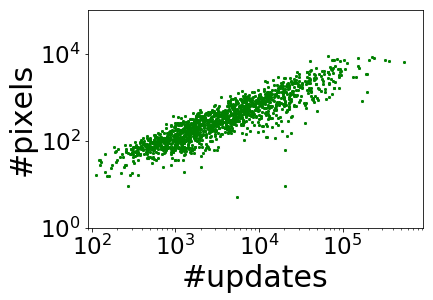

In [216]:
%matplotlib inline

def plot_updates_vs_pixels(X, Y, output_file_name):
    plt.clf()
    fig, ax = plt.subplots()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('#pixels', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1,100000)
    ax.set_xlim(90,None)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_pixels(X, Y, "../plots/plot_updates_vs_pixels.svg")

5

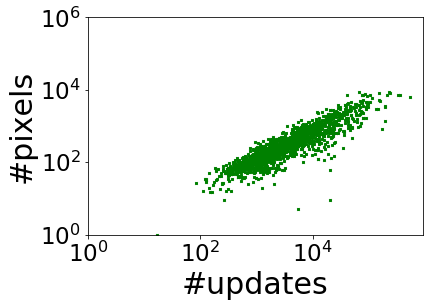

In [103]:
#Showing project IDs on mouse hovering. Based on:
#https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib

%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('#pixels', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000000)
ax.set_xlim(1,None)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Update_vs_User'></a>
# Update vs User

In [104]:
#Updates vs. users per project
X,Y = Create_Array(updates_per_proj, users_per_proj)

#Updates vs. users: ratio and ID
ratios, IDs = Ratio(updates_per_proj,users_per_proj, names)

In [105]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [106]:
#Correlation
np.corrcoef(X, Y)

array([[1.        , 0.92641613],
       [0.92641613, 1.        ]])

In [107]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    usr = users_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", users: ", usr, ", updates: ", up, ", users/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 0 , project:  Juke Juice power-up , users:  346 , updates:  817 , users/update:  0.423500611995104         , 
description:  Juke Juice allows you to accelerate and reach your maximum speed at faster rates, making it easier to avoid contact with other players and escape tricky situations. 

# 1 , project:  73 and 35 , users:  975 , updates:  2581 , users/update:  0.37776055792328556         , 
description:  73 and 35 refers to an Oldschool Runescape PKer B0aty.<br>73 refers to an old vide of his where his friend bets him he won't die to a weapon when he is at 73 health, and immediately after gets hit a 73.<br>35 refers to him getting hit with an obscure weapon called a Dragon Warhammer during his stream of Deadman mode, a special PvP mode of Oldschool Runescape. 

# 2 , project:  The Swiss Heart , users:  249 , updates:  664 , users/update:  0.375         , 
description:  The heart of Switzerland, defended by /r/SwissNeutralityZone 

# 3 , project:  The Tree , users:  266 , updates:  

In [108]:
#Bottom-10    
for i in range(1, 11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    usr = users_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", users: ", usr, ", updates: ", up, ", users/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  venus , users:  204 , updates:  10008 , users/update:  0.02038369304556355         , 
description:   

# 2 , project:  A-NI , users:  42 , updates:  1970 , users/update:  0.02131979695431472         , 
description:  Anti-Nub Incorporated (A-NI) is an EVE: Online based corporation, branching out to other games such as Dota 2. 

# 3 , project:  Parrot , users:  122 , updates:  5589 , users/update:  0.021828591876901057         , 
description:   Our cute little birb.  Drawn by members of /r/Parrots. 

# 4 , project:  The Purple Heart , users:  18 , updates:  760 , users/update:  0.02368421052631579         , 
description:  The purple heart you see here is one of the few things that has been here from start to finish. It was done almost single handedly by Reddit user IceNinjaPants. After a vent on reddit place, /r/placehearts refused to help as they already had their hands full.
The purple heart survived an attack from a white void, and a giant face.
The heart now represent

<Figure size 432x288 with 0 Axes>

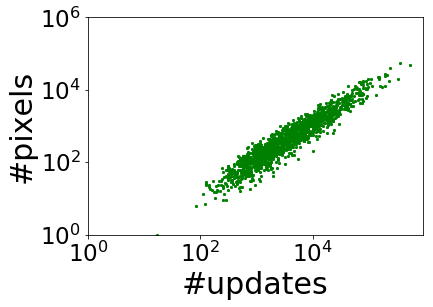

In [109]:
%matplotlib inline

def plot_updates_vs_pixels(X, Y, output_file_name):
    plt.clf()
    fig, ax = plt.subplots()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('#pixels', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1,1000000)
    ax.set_xlim(1,None)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_pixels(X, Y, "../plots/plot_updates_vs_users.svg")

5

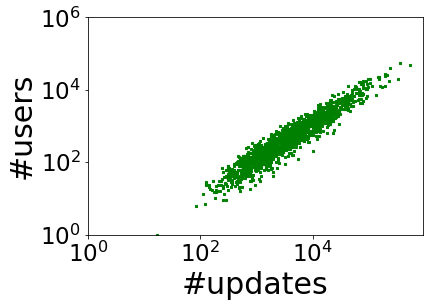

In [110]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('#users', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000000)
ax.set_xlim(1,None)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Update_vs_Time'></a>
# Update vs Time

In [111]:

#Updates vs. time per project
X,Y = Create_Array(updates_per_proj, times_per_proj)

#Updates vs. time: ratio and ID
ratios, IDs = Ratio(updates_per_proj,times_per_proj, names)

In [112]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [113]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.14380141],
       [0.14380141, 1.        ]])

In [114]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]/ (1000 * 60 * 60)
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", updates: ", up, ", times/update: ", r, "\
        , \ndescription: ", desc, "\n") 
    

# 0 , project:  Tiny danish flag , time:  65.10416666666667 , updates:  112 , times/update:  0.5812872023809524         , 
description:  denmark is a samll nation in the nothern part of europe 

# 1 , project:  St.Georges Flag , time:  70.94416666666666 , updates:  125 , times/update:  0.5675533333333334         , 
description:  Created by /u/tinysocksb. The piece took several hours to create and was destroyed for reasons unknown, replaced by black blocks the space appears unused. Picture can be seen below on imgur. 

# 2 , project:  The R , time:  65.53111111111112 , updates:  121 , times/update:  0.5415794306703398         , 
description:  The R of the sub r/The_R 

# 3 , project:  Italy heart , time:  68.73277777777778 , updates:  128 , times/update:  0.5369748263888889         , 
description:  A random heart or a symbol of cooperation between Scott Pilgrim and Italy? 

# 4 , project:  Red P , time:  66.35027777777778 , updates:  126 , times/update:  0.5265895061728395         , 
de

In [115]:
#Bottom-10    
for i in range(1, 11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]/ (1000 * 60 * 60)
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", updates: ", up, ", times/update: ", r, "\
        , \ndescription: ", desc, "\n") 
    

# 1 , project:  The Red Dot , time:  0.0 , updates:  17 , times/update:  0.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  osu! Logo , time:  70.93416666666667 , updates:  544512 , times/update:  0.0001302710806495847         , 
description:  The logo for the rhythm game osu. This was one of the more ambitious projects of /r/place and was intended to be more detailed. Unfortunately, a LoL player by the name of loltyler1, told his fans to attack the logo by filling it with the void, resulting in its current vandalized state. 

# 3 , project:  The Blue Empire , time:  71.98194444444445 , updates:  359971 , times/update:  0.00019996595404753284         , 
description:  A simple project started to make the bottom right corner completely blue, quickly grew to be the largest piece of art in r/place history. Within 12 hours it had covered more than half

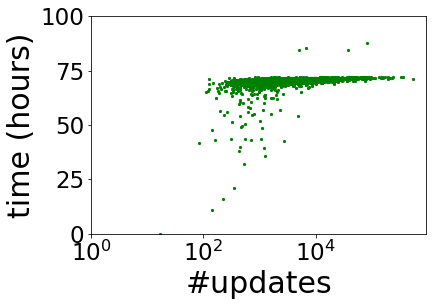

In [116]:
%matplotlib inline
Y=Y/ (1000 * 60 * 60)
def plot_updates_vs_times(X, Y, output_file_name):
    plt.clf()
    ax = plt.subplot()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_xlim(1,None)
    ax.set_ylim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_times(X, Y, "../plots/plot_updates_vs_times.svg")

5

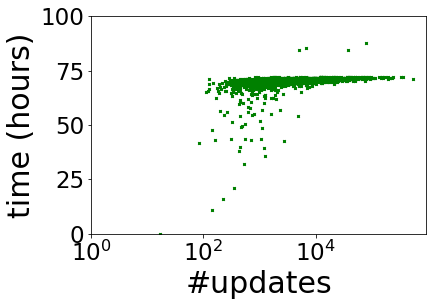

In [117]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('time (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_xlim(1,None)
ax.set_ylim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Update_vs_Area'></a>
# Update vs Area

In [118]:
#Updates vs. area per project
X,Y = Create_Array(updates_per_proj, area_per_proj)

#Updates vs. time: ratio and ID
ratios, IDs = Ratio(updates_per_proj,area_per_proj, names)

In [119]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [120]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.00968382],
       [-0.00968382,  1.        ]])

In [121]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ar = area_per_proj[proj] 
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", updates: ", up, ", area/update: ", r, "\
        , \ndescription: ", desc, "\n") 

# 0 , project:  The Red Dot , area:  1.0 , updates:  17 , area/update:  0.058823529411764705         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 1 , project:  Tiny danish flag , area:  1.0 , updates:  112 , area/update:  0.008928571428571428         , 
description:  denmark is a samll nation in the nothern part of europe 

# 2 , project:  Smiley Face , area:  0.75 , updates:  84 , area/update:  0.008928571428571428         , 
description:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 3 , project:  The R , area:  1.0 , updates:  121 , area/update:  0.008264462809917356         , 
description:  The R of the sub r/The_R 

# 4 , project:  St.Georges Flag , area:  1.0 , updates:  125 , area/update:  0.008         , 
description:  Created by /u/tinysocksb. The piece took several hours to create and was destroyed for reasons unknown, re

In [122]:
#Bottom-10

for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ar = area_per_proj[proj] 
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", updates: ", up, ", area/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  Big Ten Corner , area:  0.26645847938308587 , updates:  227597 , area/update:  1.1707468876263127e-06         , 
description:  11 of the 14 teams in the Big Ten have their logo represented in this part of r/place.<br>The Big Ten Conference (B1G), is the oldest Division I collegiate athletic conference in the United States. The conference, consisting of 14 members as of 2016, competes in the NCAA Division I; its football teams compete in the Football Bowl Subdivision (FBS), the highest level of NCAA competition in that sport. 

# 2 , project:  osu! Logo , area:  0.7994145348097238 , updates:  544512 , area/update:  1.4681302428775193e-06         , 
description:  The logo for the rhythm game osu. This was one of the more ambitious projects of /r/place and was intended to be more detailed. Unfortunately, a LoL player by the name of loltyler1, told his fans to attack the logo by filling it with the void, resulting in its current vandalized state. 

# 3 , project:  The Sover

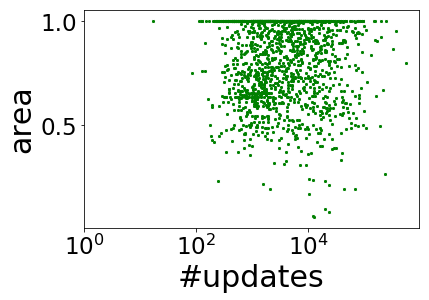

In [123]:
%matplotlib inline
def plot_updates_vs_area(X, Y, output_file_name):
    plt.clf()
    ax = plt.subplot()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('area', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_xlim(1,None)
    #ax.set_ylim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_area(X, Y, "../plots/plot_updates_vs_area.svg")

5

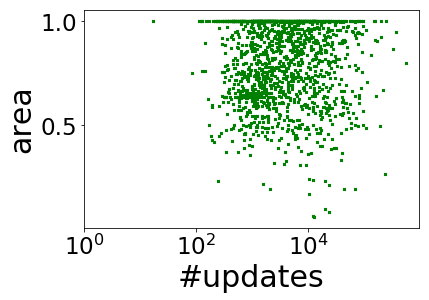

In [124]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('area', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_xlim(1,None)
#ax.set_ylim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Pixels_vs_Entropy'></a>
# Pixels vs Entropy

In [125]:
#Pixels vs. entropy per project
X,Y = Create_Array(pixels_per_proj, entropy_per_proj)

#Pixels vs. entropy: ratio and ID
ratios, IDs = Ratio(pixels_per_proj,entropy_per_proj, names)

In [126]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [127]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.23457986],
       [0.23457986, 1.        ]])

In [128]:
#Entropy/pixel
  
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ent = entropy_per_proj[proj]
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", pixels: ", pix, ", entropy/pixel: ", r, "\
        , \ndescription: ", desc, "\n")     

# 0 , project:  Ethiopian Flag , entropy:  1.310783678099714 , pixels:  9 , entropy/pixel:  0.1456426308999682         , 
description:  The flag of the african country of Ethiopia. It was created and maintained by a single user (/u/faithfuljohn), hence why it is so small. 

# 1 , project:  The purple corner , entropy:  1.2148896539491205 , pixels:  9 , entropy/pixel:  0.13498773932768005         , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 2 , project:  PINLAND , entropy:  0.6730116670092565 , pixels:  5 , entropy/pixel:  0.1346023334018513         , 
description:  It was very common for users to change these few pixels so the F turned into a P 

# 3 , project:  Eightf

In [129]:
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ent = entropy_per_proj[proj]
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", pixels: ", pix, ", entropy/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  The Red Dot , entropy:  0.0 , pixels:  1 , entropy/pixel:  0.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  FRC team #4611 , entropy:  0.0 , pixels:  144 , entropy/pixel:  0.0         , 
description:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 3 , project:  Former location of the Bullet Kin , entropy:  0.043331176817649 , pixels:  900 , entropy/pixel:  4.814575201961e-05         , 
description:  The location of where a Bullet Kin, a common enemy from the game 

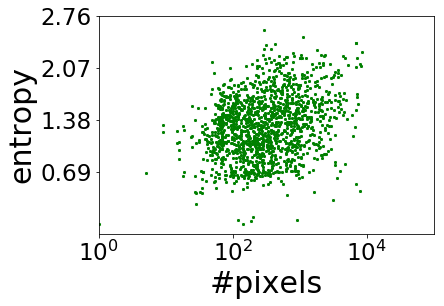

In [130]:
%matplotlib inline
def plot_pixels_vs_entropy(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    ax.set_xscale('log')
    ax.set_xlim(1,100000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_entropy(X, Y, "../plots/plot_pixels_vs_entropy.svg")

5

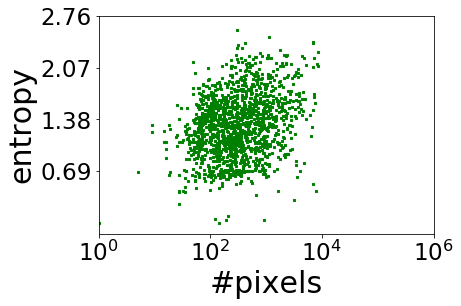

In [131]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('entropy', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#pixels', fontsize=30)
ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
ax.set_xscale('log')
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Pixels_vs_Users'></a>
# Pixels vs Users

In [132]:
#Pixels vs. users per project
X,Y = Create_Array(pixels_per_proj, users_per_proj)

#Pixels vs. users: ratio and ID
ratios, IDs = Ratio(pixels_per_proj,users_per_proj, names)

In [133]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [134]:
#Correlation

np.corrcoef(X, Y)

array([[1.      , 0.724012],
       [0.724012, 1.      ]])

In [135]:
#users/pixel
  
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    usr = users_per_proj[proj]
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", users: ", usr, ", pixels: ", pix, ", users/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 0 , project:  The purple corner , users:  3689 , pixels:  9 , users/pixel:  409.8888888888889         , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 1 , project:  PINLAND , users:  1614 , pixels:  5 , users/pixel:  322.8         , 
description:  It was very common for users to change these few pixels so the F turned into a P 

# 2 , project:  Trans Heart , users:  3049 , pixels:  61 , users/pixel:  49.98360655737705         , 
description:  The first heart created by /r/TransFlagPlace, marking the centerpoint of the flag. 

# 3 , project:  Kirby , users:  8626 , pixels:  250 , users/pixel:  34.504         , 
description:  The remnants of a sprite of the video game char

In [136]:
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    usr = users_per_proj[proj]
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", users: ", usr, ", pixels: ", pix, ", users/pixel: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  Bread , users:  10 , pixels:  70 , users/pixel:  0.14285714285714285         , 
description:  A loaf of Bread constructed by a few users of Anarchist subreddits to represent the ideas of Pyotr Kropotkin, Russian anarchist and author of the influential anarchist book, 'The Conquest of Bread'. Since this was a relatively late addition to the place, and is not a particularly obviously Leftist symbol, the Bread saw little vandalism and required no bots to maintain. 

# 2 , project:  Seplunky , users:  59 , pixels:  370 , users/pixel:  0.15945945945945947         , 
description:  Player character from the platform indie game Spelunky. 

# 3 , project:  Ashley , users:  52 , pixels:  326 , users/pixel:  0.15950920245398773         , 
description:  Ashley is a young witch who lives alone in a haunted mansion in Diamond City. While her spells are mighty and powerful, she secretly longs for friends to talk to. She appears in the WarioWare game series, with her most recent appear

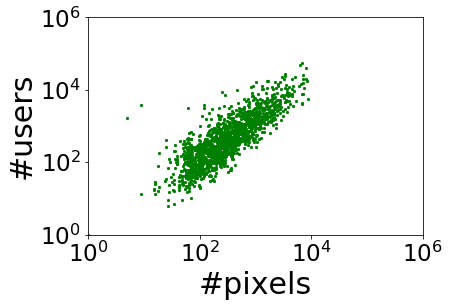

In [137]:
%matplotlib inline
def plot_pixels_vs_users(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('#users', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1,1000000)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_users(X, Y, "../plots/plot_pixels_vs_users.svg")

5

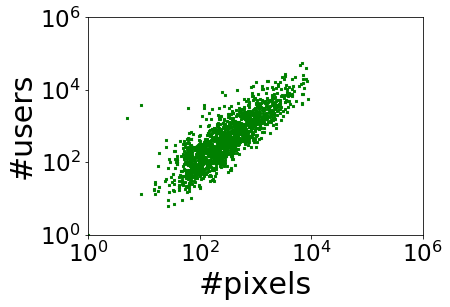

In [138]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('#users', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#pixels', fontsize=30)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000000)
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Pixels_vs_Time'></a>
# Pixels vs Time

In [139]:
#Pixels vs. time per project
X,Y = Create_Array(pixels_per_proj, times_per_proj)

#Pixels vs. area: ratio and ID
ratios, IDs = Ratio(pixels_per_proj, times_per_proj, names)

In [140]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [141]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.20449937],
       [0.20449937, 1.        ]])

In [142]:
 #Time/Pixel
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]/(1000 * 60 * 60)
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", pixels: ", pix, ", time/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 
    

# 0 , project:  PINLAND , time:  65.33944444444444 , pixels:  5 , time/pixel:  13.06788888888889        , 
description:  It was very common for users to change these few pixels so the F turned into a P 

# 1 , project:  The purple corner , time:  71.92555555555556 , pixels:  9 , time/pixel:  7.991728395061729        , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 2 , project:  Ethiopian Flag , time:  56.03638888888889 , pixels:  9 , time/pixel:  6.226265432098765        , 
description:  The flag of the african country of Ethiopia. It was created and maintained by a single user (/u/faithfuljohn), hence why it is so small. 

# 3 , project:  Stealth Pepe , time:  69.48083333

In [143]:
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]/(1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", pixels: ", pix, ", time/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  The Red Dot , time:  0.0 , pixels:  1 , time/pixel:  0.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  Madoka Magica , time:  71.48638888888888 , pixels:  8606 , time/pixel:  0.008306575515790017         , 
description:  Puella Magi Madoka Magica is a magical girl anime released on-air in 2011 

# 3 , project:  Big Ten Corner , time:  71.62777777777778 , pixels:  8362 , time/pixel:  0.00856586675170746         , 
description:  11 of the 14 teams in the Big Ten have their logo represented in this part of r/place.<br>The Big Ten Conference (B1G), is the oldest Division I collegiate athletic conference in the United States. The conference, consisting of 14 members as of 2016, competes in the NCAA Division I; its football teams compete in the Football Bowl Subdivision (FBS), the highest level of NCAA competition in that sport. 

# 4 ,

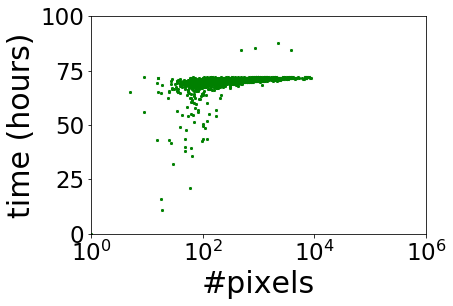

In [144]:
%matplotlib inline
Y= Y/(3600*1000)
def plot_pixels_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_xscale('log')
    ax.set_ylim(0,100)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_times(X, Y, "../plots/plot_pixels_vs_times.svg")

5

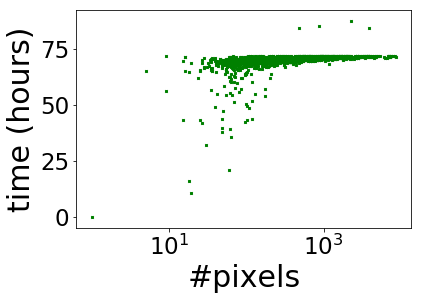

In [145]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('time (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#pixels', fontsize=30)
ax.set_xscale('log')
#ax.set_ylim(0,100)
#ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Pixels_vs_Area'></a>
# Pixels vs Area

In [146]:
#Pixels vs. area per project
X,Y = Create_Array(pixels_per_proj, area_per_proj)

#Pixels vs. area: ratio and ID
ratios, IDs = Ratio(pixels_per_proj, area_per_proj, names)

In [147]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [148]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.05665254],
       [-0.05665254,  1.        ]])

In [149]:
 #Area/Pixel
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ar = area_per_proj[proj] 
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", pixels: ", pix, ", area/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 0 , project:  The Red Dot , area:  1.0 , pixels:  1 , area/pixel:  1.0        , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 1 , project:  PINLAND , area:  0.625 , pixels:  5 , area/pixel:  0.125        , 
description:  It was very common for users to change these few pixels so the F turned into a P 

# 2 , project:  Ethiopian Flag , area:  1.0 , pixels:  9 , area/pixel:  0.1111111111111111        , 
description:  The flag of the african country of Ethiopia. It was created and maintained by a single user (/u/faithfuljohn), hence why it is so small. 

# 3 , project:  The purple corner , area:  1.0 , pixels:  9 , area/pixel:  0.1111111111111111        , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/pur

In [150]:
 #bottom-10

for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ar = area_per_proj[proj] 
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", pixels: ", pix, ", area/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  Big Ten Corner , area:  0.26645847938308587 , pixels:  8362 , area/pixel:  3.1865400548084894e-05        , 
description:  11 of the 14 teams in the Big Ten have their logo represented in this part of r/place.<br>The Big Ten Conference (B1G), is the oldest Division I collegiate athletic conference in the United States. The conference, consisting of 14 members as of 2016, competes in the NCAA Division I; its football teams compete in the Football Bowl Subdivision (FBS), the highest level of NCAA competition in that sport. 

# 2 , project:  The Dutch border , area:  0.08088080501873605 , pixels:  1921 , area/pixel:  4.210349037935245e-05        , 
description:  used by the netherlands as border for created projects and to mark of or expand to new territory. It represents the Dutch flag  

# 3 , project:  Parahumans , area:  0.19071626470454647 , pixels:  4199 , area/pixel:  4.5419448607893895e-05        , 
description:  Banner for /r/parahumans, fan subreddit for web seria

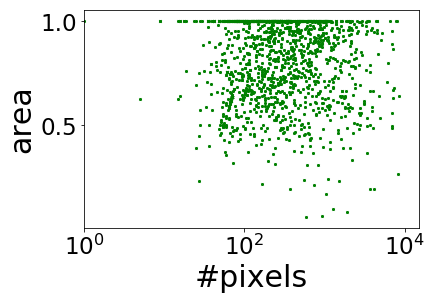

In [151]:
%matplotlib inline
def plot_pixels_vs_area(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('area', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_xscale('log')
    #ax.set_ylim(0,100)
    ax.set_xlim(1,15000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_area(X, Y, "../plots/plot_pixels_vs_area.svg")

5

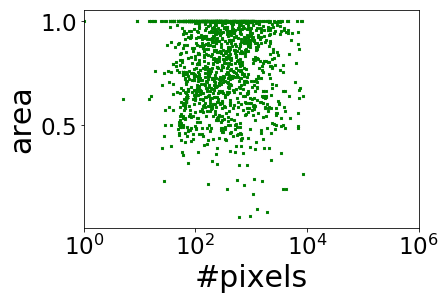

In [152]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('area', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#pixels', fontsize=30)
ax.set_xscale('log')
#ax.set_ylim(0,100)
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Users_vs_Entropy'></a>
# Users_vs_Entropy

In [153]:
#Users vs. entropy per project

X,Y = Create_Array(users_per_proj, entropy_per_proj)

#Users vs. entropy: ratio and ID
ratios, IDs = Ratio(users_per_proj, entropy_per_proj, names)

In [154]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [155]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.04805247],
       [0.04805247, 1.        ]])

In [156]:
 #Entropy/user
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ent = entropy_per_proj[proj] 
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", users: ", usr, ", entropy/user: ", r, "\
        , \ndescription: ", desc, "\n") 

# 0 , project:  Bread , entropy:  1.3981439712463501 , users:  10 , entropy/user:  0.139814397124635        , 
description:  A loaf of Bread constructed by a few users of Anarchist subreddits to represent the ideas of Pyotr Kropotkin, Russian anarchist and author of the influential anarchist book, 'The Conquest of Bread'. Since this was a relatively late addition to the place, and is not a particularly obviously Leftist symbol, the Bread saw little vandalism and required no bots to maintain. 

# 1 , project:  Smiley Face , entropy:  0.6365141682948128 , users:  6 , entropy/user:  0.10608569471580213        , 
description:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 2 , project:  Ethiopian Flag , entropy:  1.310783678099714 , users:  13 , entropy/user:  0.100829513699978        , 
description:  The flag of the african country of Ethiopia. It was created and maintained by a single user (/u/faithfuljohn), hence why it is so small. 

# 3 , project:  M

In [157]:
 #Entropy/user
#Bottom-10

for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ent = entropy_per_proj[proj] 
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", users: ", usr, ", entropy/user: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  The Red Dot , entropy:  0.0 , users:  1 , entropy/user:  0.0        , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  FRC team #4611 , entropy:  0.0 , users:  641 , entropy/user:  0.0        , 
description:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 3 , project:  Former location of the Bullet Kin , entropy:  0.043331176817649 , users:  6866 , entropy/user:  6.310978272305418e-06        , 
description:  The location of where a Bullet Kin, a common enemy from the game Enter

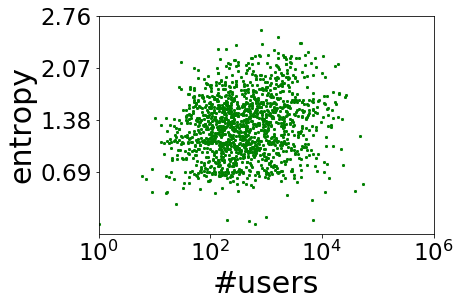

In [158]:
%matplotlib inline
def plot_users_vs_entropy(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#users', fontsize=30)
    ax.set_xscale('log')
    ax.set_yticks(np.arange(0.69, math.exp(1)+.1, .69))
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_vs_entropy(X, Y, "../plots/plot_users_vs_entropy.svg")

5

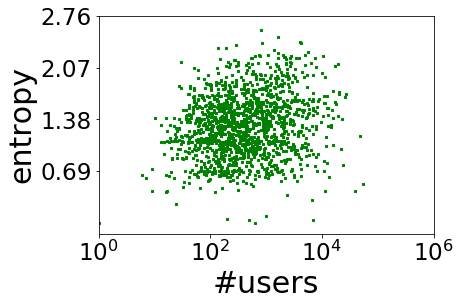

In [159]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('entropy', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#users', fontsize=30)
ax.set_xscale('log')
ax.set_yticks(np.arange(0.69, math.exp(1)+.1, .69))
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Users_vs_Time'></a>
# Users vs Time

In [160]:
#Users vs. time per project
X,Y = Create_Array(users_per_proj, times_per_proj)

#Users vs. time: ratio and ID
ratios, IDs = Ratio(users_per_proj, times_per_proj, names)

In [161]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [162]:
#Correlation

np.corrcoef(X, Y)

array([[1.       , 0.1498051],
       [0.1498051, 1.       ]])

In [163]:
#Time/User
#Top -10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]/ (1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", users: ", usr, ", time/user: ", r, "\
        , \ndescription: ", desc, "\n")    

# 0 , project:  The R , time:  65.53111111111112 , users:  7 , time/user:  9.361587301587301         , 
description:  The R of the sub r/The_R 

# 1 , project:  CUL , time:  68.76416666666667 , users:  9 , time/user:  7.640462962962963         , 
description:  CUL means "ass" in french.
We are very proud to have written this word a few hours before the end of /r/place.
This masterpiece is the work of Marvolo and Nicho. This is our gift to the internet. 

# 2 , project:  BIGBANG , time:  68.70333333333333 , users:  9 , time/user:  7.633703703703703         , 
description:  BIGBANG is a South Korean boy group who debuted in 2006 under YG Entertainment. The group, consisting of members T.O.P, Taeyang, Daesung, Seungri and leader G-Dragon are often labelled the 'Kings of K-pop' and can be considered the most influential boy group within Asia. Pictured to the left is the Bigbang crown which sits atop of the lightsticks which their fans (VIPs) wave and Bigbang concerts. 

# 3 , project:  Smi

In [164]:
#Time/User
#Bottom -10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]/(1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", users: ", usr, ", time/user: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  The Red Dot , time:  0.0 , users:  1 , time/user:  0.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  The Blue Empire , time:  71.98194444444445 , users:  54510 , time/user:  0.0013205273242422391         , 
description:  A simple project started to make the bottom right corner completely blue, quickly grew to be the largest piece of art in r/place history. Within 12 hours it had covered more than half of the bottom canvas, completely in blue, with thousand of dedicated supporters. The blue corner was pushed back gradually as more organised projects superseded the early pattern-based structures. The current blue corner is a mere reminder of what the empire was in it's former glory. 

# 3 , project:  osu! Logo , time:  70.93416666666667 , users:  47727 , time/user:  0.0014862481753863989         , 
description:  The logo for the rhy

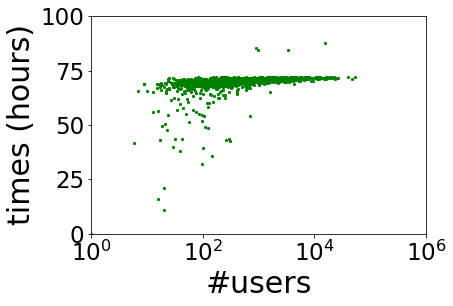

In [165]:
%matplotlib inline
Y = Y/(1000 * 60 * 60)
def plot_users_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('times (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#users', fontsize=30)
    ax.set_xscale('log')
    ax.set_ylim(0,100)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_vs_times(X, Y, "../plots/plot_users_vs_times.svg")

5

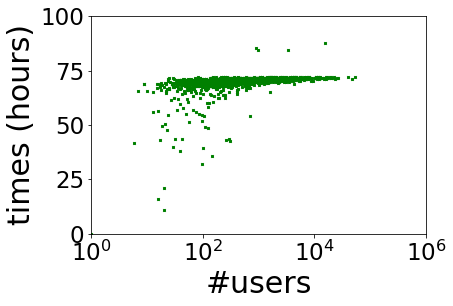

In [166]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('times (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#users', fontsize=30)
ax.set_xscale('log')
ax.set_ylim(0,100)
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Users_vs_Area'></a>
# Users vs Area

In [167]:
#Users vs. area per project
X,Y = Create_Array(users_per_proj, area_per_proj)

#Users vs. area: ratio and ID
ratios, IDs = Ratio(users_per_proj, area_per_proj, names)

In [168]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [169]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.00161891],
       [-0.00161891,  1.        ]])

In [170]:
#Area/User
#Top -10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj] 
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", users: ", usr, ", area/user: ", r, "\
        , \ndescription: ", desc, "\n")   

# 0 , project:  The Red Dot , area:  1.0 , users:  1 , area/user:  1.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 1 , project:  The R , area:  1.0 , users:  7 , area/user:  0.14285714285714285         , 
description:  The R of the sub r/The_R 

# 2 , project:  Smiley Face , area:  0.75 , users:  6 , area/user:  0.125         , 
description:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 3 , project:  CUL , area:  0.8909090909090909 , users:  9 , area/user:  0.09898989898989899         , 
description:  CUL means "ass" in french.
We are very proud to have written this word a few hours before the end of /r/place.
This masterpiece is the work of Marvolo and Nicho. This is our gift to the internet. 

# 4 , project:  Tiny danish flag , area:  1.0 , users:  13 , area/user:  0.07692307692307693         , 
description:  denmark is

In [171]:
#Area/User
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj] 
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", users: ", usr, ", area/user: ", r, "\
        , \ndescription: ", desc, "\n")  

# 1 , project:  Big Ten Corner , area:  0.26645847938308587 , users:  17002 , area/user:  1.5672184412603567e-05         , 
description:  11 of the 14 teams in the Big Ten have their logo represented in this part of r/place.<br>The Big Ten Conference (B1G), is the oldest Division I collegiate athletic conference in the United States. The conference, consisting of 14 members as of 2016, competes in the NCAA Division I; its football teams compete in the Football Bowl Subdivision (FBS), the highest level of NCAA competition in that sport. 

# 2 , project:  osu! Logo , area:  0.7994145348097238 , users:  47727 , area/user:  1.674973358496708e-05         , 
description:  The logo for the rhythm game osu. This was one of the more ambitious projects of /r/place and was intended to be more detailed. Unfortunately, a LoL player by the name of loltyler1, told his fans to attack the logo by filling it with the void, resulting in its current vandalized state. 

# 3 , project:  The Blue Empire , ar

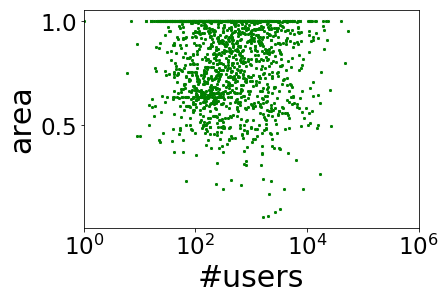

In [172]:
%matplotlib inline
def plot_users_vs_area(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('area', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#users', fontsize=30)
    ax.set_xscale('log')
    #ax.set_ylim(0,100)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_vs_area(X, Y, "../plots/plot_users_vs_area.svg")

5

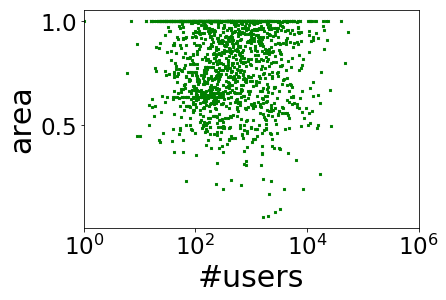

In [173]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('area', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#users', fontsize=30)
ax.set_xscale('log')
#ax.set_ylim(0,100)
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Time_vs_Entropy'></a>
# Time vs Entropy

In [174]:
#Time vs. entropy per project

X,Y = Create_Array(times_per_proj, entropy_per_proj)

#Users vs. entropy: ratio and ID
ratios, IDs = Ratio(times_per_proj, entropy_per_proj, names)

In [175]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [176]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.14341109],
       [0.14341109, 1.        ]])

In [177]:
#Entropy/Time
#Top-10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]/(1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    ent = entropy_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", time: ", tm, ", entropy/time: ", r, "\
        , \ndescription: ", desc, "\n")    

# 0 , project:  Seventeen , entropy:  0.6806294878916634 , time:  10.676111111111112 , entropy/time:  4.919179545105198e-15         , 
description:  SEVENTEEN, or SVT, is a South Korean boy idol group that debuted in 2015 with Pledis Entertainment. Their members are divided into three sub-units. Their official fan club is known as Carat, with a jewel icon.  It is represented here in their fandom colors. 

# 1 , project:  Tetris , entropy:  2.1516028645952874 , time:  39.6825 , entropy/time:  4.183676420389479e-15         , 
description:  Depicts all 7 tetris pieces 

# 2 , project:  TOPS , entropy:  1.0910839074486685 , time:  21.069166666666668 , entropy/time:  3.995818839802577e-15         , 
description:  A school program called TOPS, written in by 3-4 people, led by /u/Thunderbird2678. 

# 3 , project:  Tiny Flaggy Flag , entropy:  1.5344598931515927 , time:  31.919444444444444 , entropy/time:  3.709327814887962e-15         , 
description:  Flaggy Flag is the Rebel Flag of the Hell

In [178]:
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]/(1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    ent = entropy_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", time: ", tm, ", entropy/time: ", r, "\
        , \ndescription: ", desc, "\n")    

# 1 , project:  FRC team #4611 , entropy:  0.0 , time:  70.25222222222222 , entropy/time:  0.0         , 
description:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 2 , project:  PUBG , entropy:  0.03315839180969552 , time:  70.37055555555555 , entropy/time:  3.635779007785015e-17         , 
description:  A small tribute dedicated to the newly released game "PLAYERUNKNOWN's Battlegrounds." Destroyed by the void in the final moments. 

# 3 , project:  Former location of the Bullet Kin , entropy:  0.043331176817649 , time:  71.28111111111112 , entropy/time:  4.690520320523787e-17         , 
description:  The location of

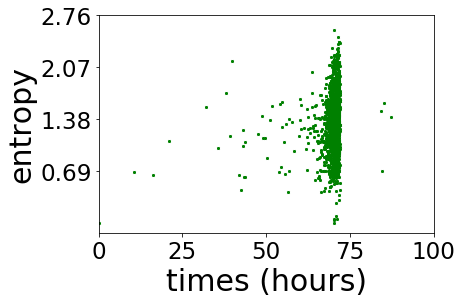

In [179]:
%matplotlib inline
X=X/(1000 * 60 * 60)
def plot_entropy_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_xlabel('times (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_ylabel('entropy', fontsize=30)
    ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    ax.set_xlim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_entropy_vs_times(X, Y, "../plots/plot_entropy_vs_times.svg")

5

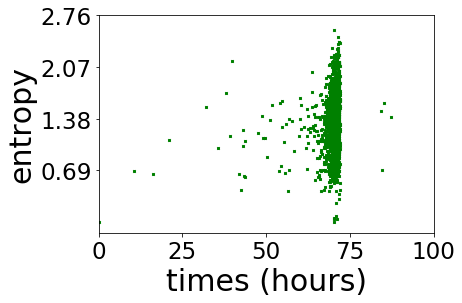

In [180]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_xlabel('times (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_ylabel('entropy', fontsize=30)
ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
ax.set_xlim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Time_vs_Area'></a>
# Time vs Area

In [181]:
#Time vs. area per project

X,Y = Create_Array(times_per_proj, area_per_proj)

#Time vs. area: ratio and ID
ratios, IDs = Ratio(times_per_proj, area_per_proj, names)

In [182]:
print(times_per_proj['1980'])

0


In [183]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [184]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.02762954],
       [-0.02762954,  1.        ]])

In [185]:
#Area/Time
#Top-10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]*(1000*3600)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj] 
    t = times_per_proj[proj]/(1000*3600)
    
    print("#", i, ", project: ", name, ", time: ", t, ", area: ", ar, ", area/time: ", r, "\
        , \ndescription: ", desc, "\n")  

# 0 , project:  Seventeen , time:  10.676111111111112 , area:  0.76 , area/time:  0.07118696987042723         , 
description:  SEVENTEEN, or SVT, is a South Korean boy idol group that debuted in 2015 with Pledis Entertainment. Their members are divided into three sub-units. Their official fan club is known as Carat, with a jewel icon.  It is represented here in their fandom colors. 

# 1 , project:  Make Trade Fair , time:  16.12527777777778 , area:  1.0 , area/time:  0.06201443558250504         , 
description:  An organization supported by frontman Chris Martin of Coldplay drawn by the nearby Coldplay redditors. 

# 2 , project:  TOPS , time:  21.069166666666668 , area:  1.0 , area/time:  0.04746272198710596         , 
description:  A school program called TOPS, written in by 3-4 people, led by /u/Thunderbird2678. 

# 3 , project:  Tiny Flaggy Flag , time:  31.919444444444444 , area:  1.0 , area/time:  0.03132886606909755         , 
description:  Flaggy Flag is the Rebel Flag of the H

In [186]:
#Area/Time
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]*(1000*3600)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj] 
    t = times_per_proj[proj]/(1000*3600)
    
    print("#", i, ", project: ", name, ", time: ", t, ", area: ", ar, ", area/time: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  The Dutch Border , time:  71.71055555555556 , area:  0.060002013490385586 , area/time:  0.0008367249845652201         , 
description:  The dutch border flag was used by the Netherlands to indicate their territory. Some of the Dutch planned to overtake the triangular area in this corner, with the Unregistered HyperCam 2, Rainbow Road and the right edge as borders. However, after some discussion of the Dutch diplomats with the makers of Pharah this plan was cancelled and an agreement was made not to expand in their direction. The first made steps of this plan, the orange colour and the border flag, still remains. 

# 2 , project:  /r/parahumans worm , time:  71.9486111111111 , area:  0.06153541749109616 , area/time:  0.0008552690113234607         , 
description:  It's a worm created by the subreddit /r/parahumans.
It doubles as a tail for "The Beast". Although it was developed independently initially, /r/Portugal suggested that its head popped up on their side, which was 

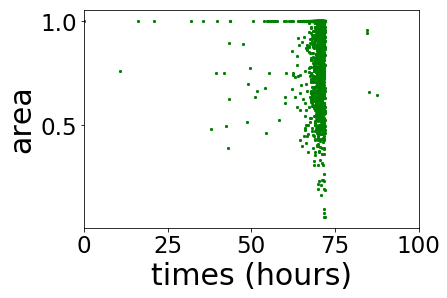

In [187]:
%matplotlib inline
X=X/(1000*3600)
def plot_area_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_xlabel('times (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_ylabel('area', fontsize=30)
    #ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    ax.set_xlim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_area_vs_times(X, Y, "../plots/plot_area_vs_times.svg")

5

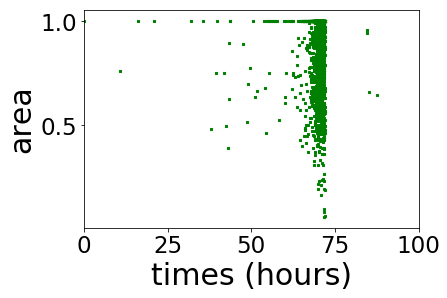

In [188]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_xlabel('times (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_ylabel('area', fontsize=30)
#ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
ax.set_xlim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Area_vs_Entropy'></a>
# Area vs Entropy

In [189]:
#Area vs. entropy per project

X,Y = Create_Array(area_per_proj, entropy_per_proj)

#Area vs. entropy: ratio and ID
ratios, IDs = Ratio(area_per_proj, entropy_per_proj, names)

In [190]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [191]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.29887048],
       [-0.29887048,  1.        ]])

In [192]:
#Entropy/Area
#Top-10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj]
    ent = entropy_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", area: ", ar, ", entropy/area: ", r, "\
        , \ndescription: ", desc, "\n")

# 0 , project:  /r/parahumans worm , entropy:  1.6244986889937705 , area:  0.06153541749109616 , entropy/area:  26.39940956326211         , 
description:  It's a worm created by the subreddit /r/parahumans.
It doubles as a tail for "The Beast". Although it was developed independently initially, /r/Portugal suggested that its head popped up on their side, which was agreed upon. It also features a traditional Portuguese hat with national colors. 

# 1 , project:  The Dutch Border , entropy:  1.3364353042149768 , area:  0.060002013490385586 , entropy/area:  22.273174289878128         , 
description:  The dutch border flag was used by the Netherlands to indicate their territory. Some of the Dutch planned to overtake the triangular area in this corner, with the Unregistered HyperCam 2, Rainbow Road and the right edge as borders. However, after some discussion of the Dutch diplomats with the makers of Pharah this plan was cancelled and an agreement was made not to expand in their direction. 

In [193]:
#Entropy/Area
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj]
    ent = entropy_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", area: ", ar, ", entropy/area: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  The Red Dot , entropy:  0.0 , area:  1.0 , entropy/area:  0.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  FRC team #4611 , entropy:  0.0 , area:  1.0 , entropy/area:  0.0         , 
description:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 3 , project:  PUBG , entropy:  0.03315839180969552 , area:  0.9494949494949495 , entropy/area:  0.03492213605489209         , 
description:  A small tribute dedicated to the newly released game "PLAYERUNKNOWN's Battlegrounds

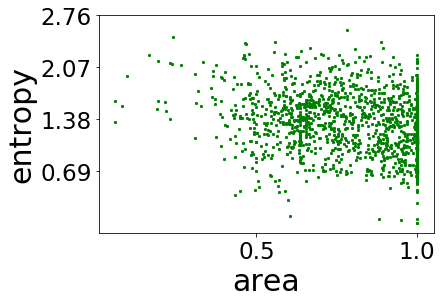

In [194]:
%matplotlib inline
def plot_entropy_vs_area(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_xlabel('area', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_ylabel('entropy', fontsize=30)
    ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    #ax.set_xlim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_entropy_vs_area(X, Y, "../plots/plot_entropy_vs_area.svg")

5

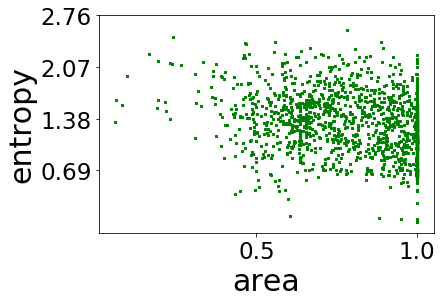

In [195]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_xlabel('area', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_ylabel('entropy', fontsize=30)
ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
#ax.set_xlim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Updates_per_time'></a>
# Updates per Time

In [196]:
#---already computed (first block)
#tile_updates, total_tile_updates = update_category_per_project()
#use tile_updates and total_tile_updates

In [197]:
def generate_figures_time(hour_marks, picID):
    begin_time = 1490918688000
    
    if picID is None:
            data = extract_canvas_color('../data/sorted_tile_placements.csv', 0, 1000, 0, 1000,\
                            begin_time+1000*60*60*hour_marks)
    else:
            data = extract_project_color('../data/sorted_tile_placements_proj.csv', picID, 
                            begin_time+1000*60*60*hour_marks)
    
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_"+str(t)+".png"
        draw_canvas(canvas_color_code_rgb(data[t]), tmp_file_name);

In [198]:
from canvas_vis import *
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

%matplotlib inline
def plot_updates_per_time_with_figure(pixel, pixel_color, other, proj, hour_marks, up_line, zoom, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    total = pixel+pixel_color+other
    ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="green", linewidth=5, label="Final", linestyle='-')
    ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="blue", linewidth=4, label="Match", linestyle='--')
    ax.plot(np.arange(other.shape[0]), 100*other, color="red", linewidth=3, label="Adv", linestyle=':')
       
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_"+str(t)+".png"
        arr_img = plt.imread(tmp_file_name, format='png')
        
        imagebox = OffsetImage(arr_img, zoom=zoom)
        imagebox.image.axes = ax
    
        ab = AnnotationBbox(imagebox, (hour_marks[t], up_line),
                        None,
                        xycoords='data',
                        pad=0.1)

        ax.add_artist(ab)
    
    ax.set_ylabel('update (%)', fontsize=20)
    ax.set_xlabel('time (hours)', fontsize=20)
    ax.tick_params(labelsize=18)
    ax.set_xlim(0, 110)

    ax.set_xticks(np.arange(0,95, 24))
    ax.set_ylim(0, 2)
    ax.set_yticks(np.arange(0,1.3, .4))
    
    ax.vlines(np.array(hour_marks),ymin=0,ymax=up_line,color='k', linestyle='--')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=3, fontsize=15)
    ax.ticklabel_format(useOffset=False, style='plain')
    #ax.set_aspect(aspect=.2)
    
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

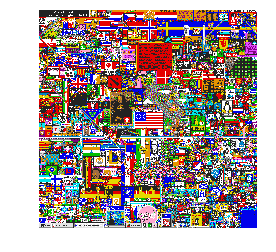

In [199]:
generate_figures_time(np.array([24, 48, 72, 96]), None)

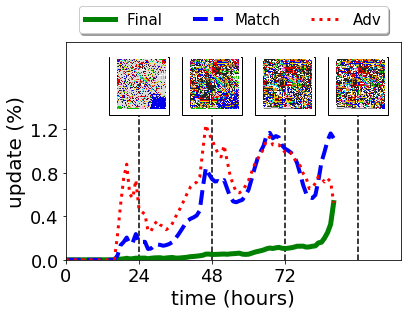

In [200]:
#zoom =.04 decides how large the figures should be

# plot_updates_per_time_with_figure(pixel, pixel_color, other, proj, hour_marks, up_line, zoom, output_file_name):
plot_updates_per_time_with_figure(total_tile_updates["final_updates"], total_tile_updates["agreeing_updates"],
    total_tile_updates["disagreeing_updates"], None, np.array([24, 48, 72, 96]), 1.6, .04,
    "../plots/plot_updates_time_total_fig.svg")

In [201]:
%matplotlib inline
def plot_updates_per_time_all_types(pixel, pixel_color, other, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    total = pixel+pixel_color+other
    ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="green", linewidth=5, label="Final", linestyle='-')
    ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="blue", linewidth=4, label="Match", linestyle='--')
    ax.plot(np.arange(other.shape[0]), 100*other, color="red", linewidth=3, label="Adv", linestyle=':')
        
    ax.set_ylabel('update (%)', fontsize=30)
    ax.set_xlabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0,97, 24))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=3, fontsize=15)
    ax.ticklabel_format(useOffset=False, style='plain')
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

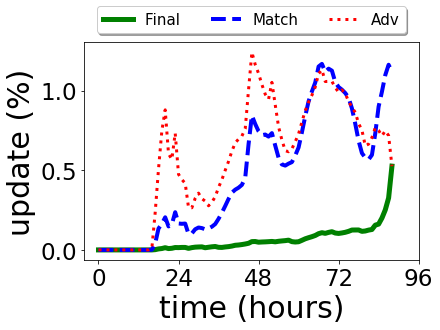

In [202]:
#total updates per time all types
plot_updates_per_time_all_types(total_tile_updates["final_updates"], total_tile_updates["agreeing_updates"],
    total_tile_updates["disagreeing_updates"], "../plots/plot_updates_time_total.svg")

5

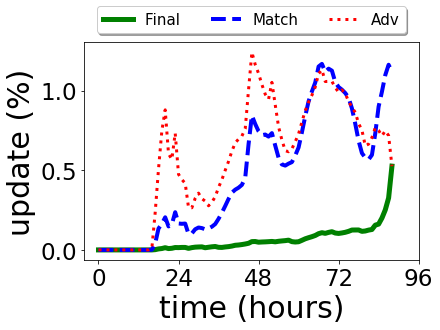

In [203]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

pixel = total_tile_updates["final_updates"]

pixel_color = total_tile_updates["agreeing_updates"]

other = total_tile_updates["disagreeing_updates"]

fig,ax = plt.subplots()
total = pixel+pixel_color+other
line1, = ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="green", linewidth=5, label="Final", linestyle='-')
line2, = ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="blue", linewidth=4, label="Match", linestyle='--')
line3, = ax.plot(np.arange(other.shape[0]), 100*other, color="red", linewidth=3, label="Adv", linestyle=':')
        
ax.set_ylabel('update (%)', fontsize=30)
ax.set_xlabel('time (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xticks(np.arange(0,97, 24))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=3, fontsize=15)
ax.ticklabel_format(useOffset=False, style='plain')
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind, line):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = "{}, {}".format(str(annot.xy[0]), 
                           str(np.around(annot.xy[1], decimals=2)))
    annot.set_text(text)

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = line1.contains(event)
        if cont:
            update_annot(ind, line1)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            cont, ind = line2.contains(event)
            
            if cont:
                update_annot(ind, line2)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                cont, ind = line3.contains(event)
            
                if cont:
                    update_annot(ind, line3)
                    annot.set_visible(True)
                    fig.canvas.draw_idle()
                else:
                    if vis:
                        annot.set_visible(False)
                    fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

## Example of some projects

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

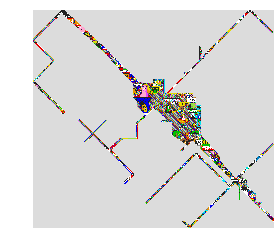

In [204]:
generate_figures_time(np.array([24, 48, 72, 96]), 286)

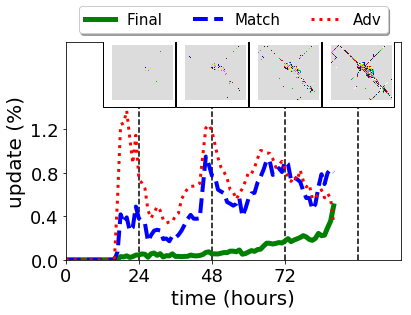

In [205]:
picID = 286

plot_updates_per_time_with_figure(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], picID, np.array([24, 48, 72, 96]), 1.7, 0.045, 
    "../plots/plot_updates_time_286_fig.svg")

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

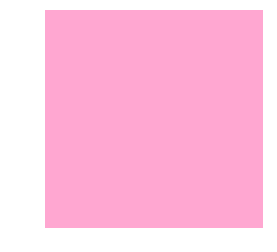

In [206]:
generate_figures_time(np.array([24, 48, 72, 96]), 1824)

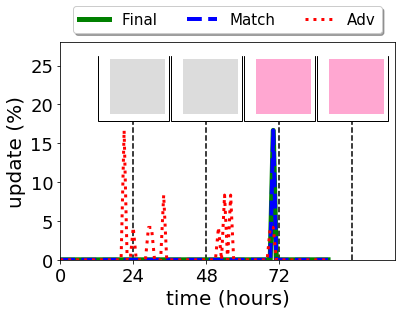

In [207]:
from canvas_vis import *
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

%matplotlib inline
def plot_updates_per_time_with_figure(pixel, pixel_color, other, proj, hour_marks, up_line, zoom, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    total = pixel+pixel_color+other
    ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="green", linewidth=5, label="Final", linestyle='-')
    ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="blue", linewidth=4, label="Match", linestyle='--')
    ax.plot(np.arange(other.shape[0]), 100*other, color="red", linewidth=3, label="Adv", linestyle=':')
       
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_"+str(t)+".png"
        arr_img = plt.imread(tmp_file_name, format='png')
        
        imagebox = OffsetImage(arr_img, zoom=zoom)
        imagebox.image.axes = ax
    
        ab = AnnotationBbox(imagebox, (hour_marks[t], up_line),
                        None,
                        xycoords='data',
                        pad=0.1)

        ax.add_artist(ab)
    
    ax.set_ylabel('update (%)', fontsize=20)
    ax.set_xlabel('time (hours)', fontsize=20)
    ax.tick_params(labelsize=18)
    ax.set_xlim(0, 110)

    ax.set_xticks(np.arange(0,95, 24))
    ax.set_ylim(0, 28)
    #ax.set_yticks(np.arange(0,1.3, .4))
    
    ax.vlines(np.array(hour_marks),ymin=0,ymax=up_line,color='k', linestyle='--')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=3, fontsize=15)
    ax.ticklabel_format(useOffset=False, style='plain')
    #ax.set_aspect(aspect=.2)
    
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

picID = 1824

plot_updates_per_time_with_figure(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], picID, np.array([24, 48, 72, 96]), 22., 0.045, 
    "../plots/plot_updates_time_1824_fig.svg")

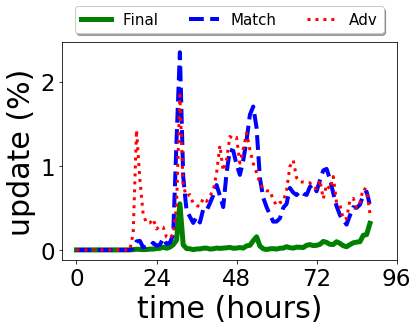

In [208]:
picID = 179
plot_updates_per_time_all_types(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], "../plots/plot_updates_time_179.svg")

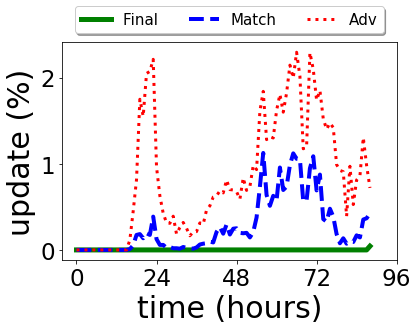

In [209]:
picID = 1493
plot_updates_per_time_all_types(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], "../plots/plot_updates_time_1493.svg")

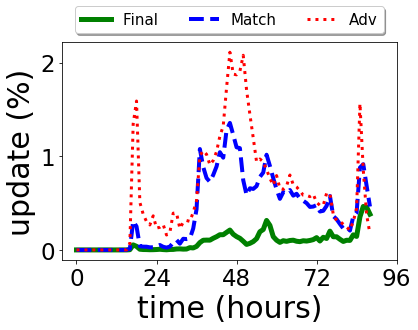

In [210]:
picID = 2
plot_updates_per_time_all_types(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], "../plots/plot_updates_time_2.svg")

<a id='#Distance_users'></a>
# Distance (Users')

In [4]:
from sklearn.cluster.bicluster import SpectralCoclustering

user_proj_matrix_pixel, users_dict, proj_dict = user_project_matrix_pixel(input_file_proj, projects_to_remove)

users_per_proj_set = users_per_project_set(input_file_proj, projects_to_remove)

In [ ]:
n_clusters = 500

cocluster = SpectralCoclustering(n_clusters=n_clusters,
                                 svd_method='arpack', random_state=0)

cocluster.fit(user_proj_matrix_pixel)
y_cocluster = cocluster.row_labels_

x_cocluster = cocluster.column_labels_

In [5]:
for project in proj_dict:
    print(project, locations[project].get_name(), " in cluster ",x_cocluster[ proj_dict[project] ])

230 Nine Inch Nails  in cluster  296
1031 University of Colorado Boulder  in cluster  165
118 In the Aeroplane Over the Sea  in cluster  401
748 Totoro  in cluster  493
206 R.I.P. Steve Irwin  in cluster  59
1038 Rainbow Grid  in cluster  352
1030 University of Pennsylvania  in cluster  138
212 AniList  in cluster  349
440 Android Gaming  in cluster  176
283 Poké balls  in cluster  380
83 DotA 2  in cluster  112
437 Professor Layton  in cluster  493
378 Nintendo Switch  in cluster  84
474 Urho Kekkonen  in cluster  71
398 Link  in cluster  347
380 Skeletor  in cluster  67
154 Radiohead  in cluster  296
115 Portland Trail Blazers  in cluster  132
145 Parahumans  in cluster  355
1618 /r/parahumans worm  in cluster  355
1329 Free Tyler1  in cluster  256
572 Bisexual pride flag  in cluster  439
179 He-Man  in cluster  187
382 AvoArmy  in cluster  154
1187 Vermont  in cluster  98
2024 Tatlin's Tower  in cluster  285
426 Wally  in cluster  356
41 Flag of India  in cluster  444
1058 The Alien

1683 Maryland Heart  in cluster  203
651 gachiGASM  in cluster  349
1358 Jordanian Heart  in cluster  52
685 Dat Boi  in cluster  221
282 Star Vs. The Forces Of Evil  in cluster  429
1779 Azerbaijan  in cluster  118
754 Red-White-Blue Ribbon  in cluster  406
69 Anarcho-Communist Flag  in cluster  41
225 Tampa Bay Lightning  in cluster  376
479 Game Attack  in cluster  85
372 Flag of Russia  in cluster  202
1756 Coat of friendship between Serbia and Russia  in cluster  106
1267 FREESM!  in cluster  138
1476 Memorial to SUP  in cluster  168
84 Creeper  in cluster  410
324 Coat of arms of the Netherlands  in cluster  123
615 Hunter × Hunter  in cluster  234
634 Deccepticon Insignia  in cluster  237
455 Wall St. Bets  in cluster  486
730 Flag of Devon  in cluster  139
922 Devon and Dorset  in cluster  139
815 Space Invaders on the Rainbow Road  in cluster  283
1854 Argentina Heart  in cluster  261
1223 Flag of the Second Spanish Republic heart  in cluster  259
406 Chicago  in cluster  277


1765 HAN.SX  in cluster  220
104 Telegram logo  in cluster  470
1851 Josuke's Hat  in cluster  307
321 DFTBA!  in cluster  376
675 Emilia Best Girl  in cluster  180
184 AOA  in cluster  484
1494 Seattle Mariners logo  in cluster  304
1608 Honduras heart  in cluster  406
1914 Faeria Yak  in cluster  230
925 Mystery Skulls Hearts (?)  in cluster  387
2014 Void Heart  in cluster  143
1450 Mudkip Square  in cluster  310
1172 대한민국  in cluster  484
687 Kingdom Key  in cluster  374
940 2112  in cluster  460
1644 Honoka Kousaka   in cluster  354
791 Kuriboh  in cluster  435
1620 Mega Man's beam  in cluster  496
688 Bird That Carries You Over A Disproportionately Small Gap (Undertale)  in cluster  447
962 Oshino Shinobu  in cluster  194
635 Pusheen the Cat  in cluster  272
1867 Norge  in cluster  258
844 Journey der Bazen  in cluster  76
1220 University of Florida  in cluster  446
1483 Red Boxes  in cluster  300
1084 /r/placede  in cluster  114
1992 Purple Z  in cluster  190
1962 Gear and Flask

In [14]:
# Group all projects in the same cluster together in a dictionary
# Key is cluster number
# Value is list of projects
proj_clusters = dict()
for project in proj_dict:
    if proj_clusters.get( x_cocluster[ proj_dict[project] ] ) == None:
        proj_clusters[ x_cocluster[ proj_dict[project] ] ] = list()
    
    proj_clusters[ x_cocluster[ proj_dict[project] ] ].append( project + "|" + locations[project].get_name() )

In [17]:
# Group all users in the same cluster together in a dictionary
# Key is cluster number
# Value is list of users
user_clusters = dict()
for user in users_dict:
    if user_clusters.get( y_cocluster[ users_dict[user] ] ) == None:
        user_clusters[ y_cocluster[ users_dict[user] ] ] = set()
        
    user_clusters[ y_cocluster[ users_dict[user] ] ].add( user )

In [18]:
# Get all the clusters that only contain users and no projects
clusters_with_only_users = set(user_clusters.keys()) - set( proj_clusters.keys() )
print(len(clusters_with_only_users), "clusters with no projects")

# Get all the clusters that only contain projects and no users
clusters_with_only_projects =  set( proj_clusters.keys() ) - set(user_clusters.keys())
print(len(clusters_with_only_projects), "clusters with no users")


140 clusters with no projects
6 clusters with no users


In [33]:
def print_k_clustsers(proj_clusters, user_clusters, k = 10, top = True):
    '''
        Print the k clusters and all projets in each cluster
        If top is true, print in order of largest cluster to smallest cluster
        If top is false, print in order of smallest cluster to largest cluster
        If k >= number of clusters, then print out every cluster.
        Also print the number of users in the same cluster
    '''
    if k >= len(proj_clusters):
        k = len(proj_clusters)
    sorted_by_longest_clusters = sorted([(len(v), k) for k, v in proj_clusters.items()], reverse = top)
    
    for i in range(k):
        cluster_size, cluster_num = sorted_by_longest_clusters[i]
        print("Cluster:",cluster_num, ", Size:", cluster_size)
        if user_clusters.get(cluster_num) != None:
            print("Number users:", len(user_clusters[cluster_num]))
        else:
            print("Number users: 0")
        for project in proj_clusters[cluster_num]:
            print("\t",project)
            proj_id, proj_name = project.split("|")
            num_users_in_proj = len( users_per_proj_set[proj_id] )
            if user_clusters.get(cluster_num) != None:
                num_users_in_cluster = len( users_per_proj_set[proj_id] & user_clusters[cluster_num] )
                user_ratio = num_users_in_cluster / num_users_in_proj
                 
                print("\tUsers in cluster/Users in proj:", str(num_users_in_cluster) + "/" + str(num_users_in_proj), user_ratio  )
                print()
            else:
                print("\tNo users in this cluster,",num_users_in_proj,"users in project" )

In [34]:
print_k_clustsers(proj_clusters, user_clusters, 1000)

Cluster: 259 , Size: 31
Number users: 6748
	 20|Flag of Germany
	Users in cluster/Users in proj: 3178/14684 0.21642604195042223

	 1469|Heart of Bangladesh
	Users in cluster/Users in proj: 20/155 0.12903225806451613

	 950|South Korea heart
	Users in cluster/Users in proj: 8/94 0.0851063829787234

	 1102|Bundesadler
	Users in cluster/Users in proj: 1512/7701 0.1963381379041683

	 1558|Welsh Heart
	Users in cluster/Users in proj: 13/39 0.3333333333333333

	 320|The Kekistan/Rainbow Flag
	Users in cluster/Users in proj: 1495/6913 0.21625922175611167

	 350|FIFA World Cup Trophy
	Users in cluster/Users in proj: 576/1892 0.3044397463002114

	 1135|KAKAO FRIENDS Heart
	Users in cluster/Users in proj: 11/58 0.1896551724137931

	 1223|Flag of the Second Spanish Republic heart
	Users in cluster/Users in proj: 53/346 0.1531791907514451

	 516|The flag of Vietnam in /r/placehearts
	Users in cluster/Users in proj: 29/272 0.10661764705882353

	 1464|Galicia Heart
	Users in cluster/Users in proj: 3

	 2002|Indonesian Flag
	Users in cluster/Users in proj: 11/129 0.08527131782945736

Cluster: 491 , Size: 13
Number users: 914
	 1555|Rainbow Hearts
	Users in cluster/Users in proj: 273/2048 0.13330078125

	 1177|Place Farts
	Users in cluster/Users in proj: 156/3178 0.04908747640025173

	 62|The Original Heart
	Users in cluster/Users in proj: 109/3750 0.029066666666666668

	 1463|Kurdistan Heart
	Users in cluster/Users in proj: 1/55 0.01818181818181818

	 751|Elucidator & Dark Repulser
	Users in cluster/Users in proj: 5/1407 0.0035536602700781805

	 1351|Colorado Heart
	Users in cluster/Users in proj: 26/108 0.24074074074074073

	 1285|Lebanon Triple Heart
	Users in cluster/Users in proj: 80/559 0.14311270125223613

	 1528|Minecraft sword over a red heart
	Users in cluster/Users in proj: 35/117 0.29914529914529914

	 1101|French-Irish heart
	Users in cluster/Users in proj: 48/481 0.0997920997920998

	 1459|Luigi
	Users in cluster/Users in proj: 53/191 0.2774869109947644

	 1261|Yoshi Eg

	Users in cluster/Users in proj: 14/292 0.04794520547945205

	 1518|Mexican Heart
	Users in cluster/Users in proj: 29/222 0.13063063063063063

	 1524|Destroyed Twenty One Pilots Logo
	Users in cluster/Users in proj: 264/985 0.26802030456852793

	 639|Calgary Flames Logo
	Users in cluster/Users in proj: 227/1764 0.12868480725623582

	 1800|Flag of Gibraltar
	Users in cluster/Users in proj: 152/501 0.3033932135728543

Cluster: 355 , Size: 8
Number users: 642
	 145|Parahumans
	Users in cluster/Users in proj: 609/3936 0.15472560975609756

	 1618|/r/parahumans worm
	Users in cluster/Users in proj: 257/1988 0.12927565392354123

	 1507|Ladybug Emblem from Miraculous Ladybug
	Users in cluster/Users in proj: 50/111 0.45045045045045046

	 1678|Lisa Wilbourn/Tattletale
	Users in cluster/Users in proj: 46/96 0.4791666666666667

	 1677|Taylor Hebert/Skitter
	Users in cluster/Users in proj: 83/139 0.5971223021582733

	 1749|Arizona Block A
	Users in cluster/Users in proj: 9/67 0.13432835820895522

	

	Users in cluster/Users in proj: 206/834 0.24700239808153476

	 726|Arqade Logo
	Users in cluster/Users in proj: 11/107 0.102803738317757

	 1967|Portuguese Avocado
	Users in cluster/Users in proj: 0/116 0.0

	 1313|Vulfpeck
	Users in cluster/Users in proj: 0/59 0.0

Cluster: 304 , Size: 5
Number users: 671
	 833|Apocalypse Rising
	Users in cluster/Users in proj: 79/438 0.18036529680365296

	 1304|UIUC
	Users in cluster/Users in proj: 396/2304 0.171875

	 784|Temple University
	Users in cluster/Users in proj: 102/547 0.18647166361974407

	 1426|/r/counting
	Users in cluster/Users in proj: 21/159 0.1320754716981132

	 1494|Seattle Mariners logo
	Users in cluster/Users in proj: 53/332 0.15963855421686746

Cluster: 296 , Size: 5
Number users: 1000
	 230|Nine Inch Nails
	Users in cluster/Users in proj: 219/988 0.2216599190283401

	 154|Radiohead
	Users in cluster/Users in proj: 792/3368 0.23515439429928742

	 1844|Unfinished Shoop-da-Whoop
	Users in cluster/Users in proj: 7/54 0.1296296296

Number users: 426
	 1318|Halo
	Users in cluster/Users in proj: 307/1938 0.15841073271413827

	 1852|Red/Blue Spartan
	Users in cluster/Users in proj: 115/383 0.3002610966057441

	 404|The Flag of Austria-Hungary
	Users in cluster/Users in proj: 47/935 0.05026737967914439

Cluster: 170 , Size: 3
Number users: 389
	 293|Love Sign
	Users in cluster/Users in proj: 39/436 0.08944954128440367

	 50|Flag of Thailand
	Users in cluster/Users in proj: 200/888 0.22522522522522523

	 1023|University Of Toronto
	Users in cluster/Users in proj: 89/394 0.22588832487309646

Cluster: 168 , Size: 3
Number users: 339
	 1476|Memorial to SUP
	Users in cluster/Users in proj: 25/191 0.13089005235602094

	 1375|Québec
	Users in cluster/Users in proj: 64/570 0.11228070175438597

	 1640|Remains of r/ockytop
	Users in cluster/Users in proj: 7/29 0.2413793103448276

Cluster: 151 , Size: 3
Number users: 373
	 1231|Half of a golden apple
	Users in cluster/Users in proj: 6/41 0.14634146341463414

	 386|Carrot
	Users

Cluster: 461 , Size: 1
Number users: 6
	 1376|Sydney FC
	Users in cluster/Users in proj: 6/52 0.11538461538461539

Cluster: 455 , Size: 1
Number users: 0
	 932|Toucan
	No users in this cluster, 59 users in project
Cluster: 449 , Size: 1
Number users: 74
	 839|Risk of Rain - Commando
	Users in cluster/Users in proj: 10/55 0.18181818181818182

Cluster: 448 , Size: 1
Number users: 282
	 264|Achievement Hunter
	Users in cluster/Users in proj: 207/2057 0.1006319883325231

Cluster: 444 , Size: 1
Number users: 1357
	 41|Flag of India
	Users in cluster/Users in proj: 1318/6879 0.19159761593254834

Cluster: 441 , Size: 1
Number users: 239
	 496|The Rise of MMA
	Users in cluster/Users in proj: 163/2163 0.07535829865926953

Cluster: 435 , Size: 1
Number users: 169
	 791|Kuriboh
	Users in cluster/Users in proj: 99/388 0.2551546391752577

Cluster: 434 , Size: 1
Number users: 3
	 645|Stealth Pepe
	Users in cluster/Users in proj: 3/18 0.16666666666666666

Cluster: 433 , Size: 1
Number users: 112
	 31

In [211]:
#Two types of distances: euclidean and cosine
# sample size denotes the number of considered users per project to compute the distance
sample_size=500
euc_dis,cos_dis,rand_dis = distance_per_project_all(input_file_proj,projects_to_remove, sample_size)

KeyboardInterrupt: 

In [ ]:
plt.hist(euc_dis.values(), bins=20)

In [ ]:
plt.hist(rand_dis[0], bins=20)

In [ ]:
plt.hist(cos_dis.values(), bins=20)

In [ ]:
plt.hist(rand_dis[1], bins=20)

In [ ]:
#Test: the users' involvemnet in a project
#project_per_user_lst=projects_per_user_list(input_file_proj, projects_to_remove)
#users_per_proj_lst=users_per_project_list(input_file_proj, projects_to_remove)